In [18]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)

source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")


In [2]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

In [33]:
learning_signals_df = read_csv('probC_sim_learning_signals.csv',col_types = cols())

(n_subjects = length(unique(learning_signals_df$ID)))
(n_conditions = length(unique(learning_signals_df$cond)))
n_clean_trials = 600

head(learning_signals_df, 100)

learning_signals_df$condition <- as.factor(learning_signals_df$cond)
learning_signals_df$acc <- as.integer(as.logical(learning_signals_df$acc))  
head(learning_signals_df )


[1] 24

[1] 4

cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond
0.02533428,0.00000000,0.00000000,0,0.008504911,0.2464204,0.700,False,0,761,lc
0.02210556,0.00000000,0.00000000,0,0.008504911,0.5253343,0.700,False,0,761,lc
0.02093549,0.03800143,-0.03800143,0,0.008504911,0.5221056,0.700,False,0,761,lc
0.02034458,0.07031973,-0.07031973,0,0.046506338,0.5209355,0.700,False,0,761,lc
0.64676887,0.10025079,-0.10025079,0,0.116826067,0.5203446,0.700,False,0,761,lc
0.07223196,0.12872809,-0.12872809,0,0.217076856,1.1467689,0.700,False,0,761,lc
0.02676855,-1.35979145,1.35979145,0,0.345804947,0.5722320,0.700,False,0,761,lc
0.02262568,0.39865059,-0.39865059,0,1.000000000,0.5267686,0.182,False,0,761,lc
0.02119378,0.70184392,-0.70184392,0,0.601349410,0.5226257,0.222,False,0,761,lc
0.02049399,0.82937058,-0.82937058,0,0.100494514,0.5211938,0.700,False,0,761,lc


cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,condition
0.02533428,0.00000000,0.00000000,0,0.008504911,0.2464204,0.7,0,0,761,lc,lc
0.02210556,0.00000000,0.00000000,0,0.008504911,0.5253343,0.7,0,0,761,lc,lc
0.02093549,0.03800143,-0.03800143,0,0.008504911,0.5221056,0.7,0,0,761,lc,lc
0.02034458,0.07031973,-0.07031973,0,0.046506338,0.5209355,0.7,0,0,761,lc,lc
0.64676887,0.10025079,-0.10025079,0,0.116826067,0.5203446,0.7,0,0,761,lc,lc
0.07223196,0.12872809,-0.12872809,0,0.217076856,1.1467689,0.7,0,0,761,lc,lc


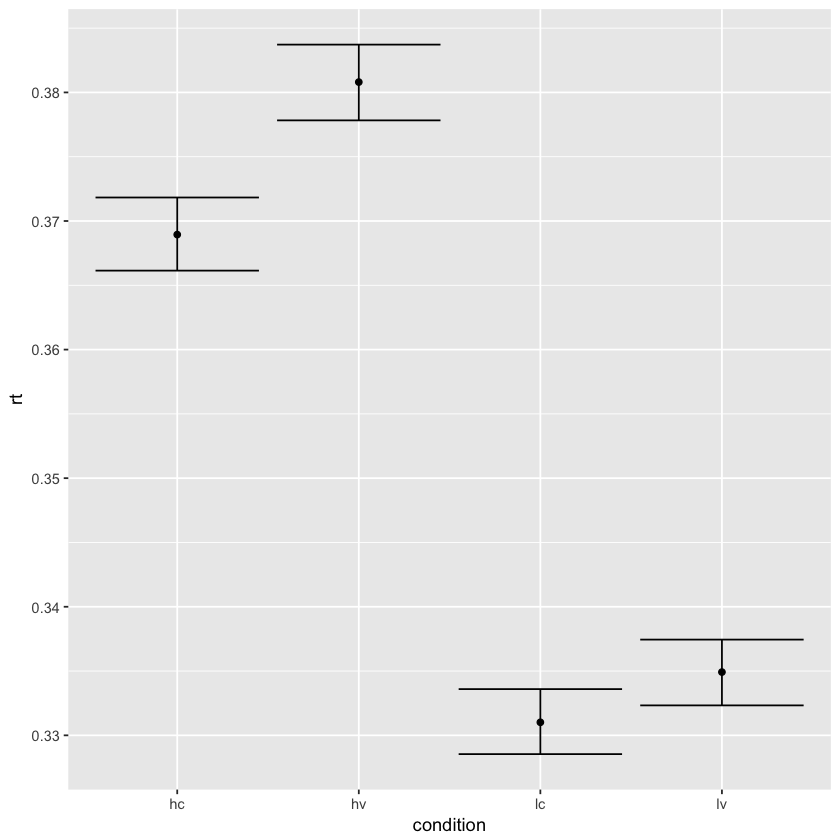

In [45]:
ggplot(learning_signals_df, aes(x=condition, y=rt)) + stat_summary(fun.y='mean', geom='point') + 
stat_summary(fun.data='mean_cl_boot', geom='errorbar')

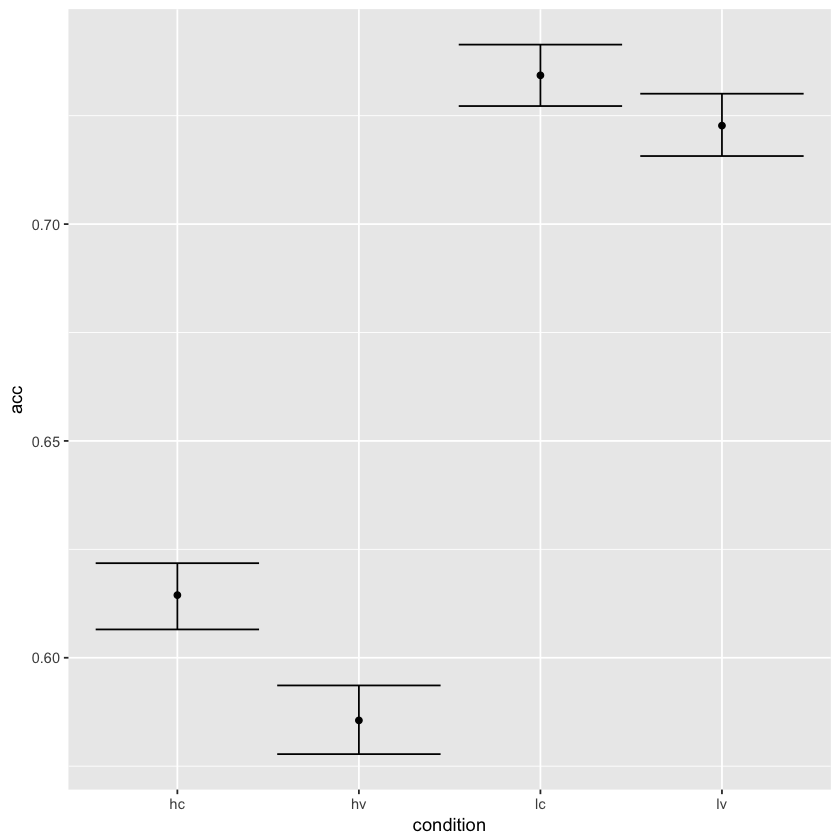

In [42]:
ggplot(learning_signals_df, aes(x=condition, y=acc)) + stat_summary(fun.y='mean', geom='point') +
stat_summary(fun.data='mean_cl_boot', geom='errorbar')

In [41]:
#recode conditions
learning_signals_df$coded_condition <- recode(learning_signals_df$condition,
  'lc' = 0,
  'hc' = 1,
  'hv' = 2,
  'lv' = 3, 
  )
#check 
learning_signals_df$coded_condition[0:5]; learning_signals_df$condition[0:5]

[1] 0 0 0 0 0

[1] lc lc lc lc lc
Levels: hc hv lc lv

In [5]:
unique(learning_signals_df$acc)

[1] "False" "True"

In [6]:
learning_signals_df$acc  <- as.numeric(as.character(learning_signals_df$acc))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
#add vector of trials based on ID & condition diff
learning_signals_df <- learning_signals_df %>% 
    group_by(null=cumsum(c(1, (diff(ID) != 0 | diff(coded_condition) !=0)))) %>% 
    mutate(trial=row_number())

In [6]:
#check that all sessions have been properly counted
nrow(learning_signals_df[learning_signals_df$trial == 600,]) == n_subjects*n_conditions
max(learning_signals_df$trial)

[1] TRUE

[1] 600

In [7]:
names(learning_signals_df)

[1] "cpp"             "target_B"        "choice_B"        "cp"             
 [5] "gen_drift"       "gen_bound"       "rt"              "acc"            
 [9] "subj_idx"        "ID"              "cond"            "condition"      
[13] "coded_condition" "null"            "trial"

In [8]:
#cast first trial as a cp so that epochs are counted correctly across subjects
learning_signals_df[learning_signals_df$trial == 1, 'cp'] = 1

In [9]:
head(learning_signals_df)

cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,condition,coded_condition,null,trial
0.02533428,0.00000000,0.00000000,1,0.008504911,0.2464204,0.7,False,0,761,lc,lc,0,1,1
0.02210556,0.00000000,0.00000000,0,0.008504911,0.5253343,0.7,False,0,761,lc,lc,0,1,2
0.02093549,0.03800143,-0.03800143,0,0.008504911,0.5221056,0.7,False,0,761,lc,lc,0,1,3
0.02034458,0.07031973,-0.07031973,0,0.046506338,0.5209355,0.7,False,0,761,lc,lc,0,1,4
0.64676887,0.10025079,-0.10025079,0,0.116826067,0.5203446,0.7,False,0,761,lc,lc,0,1,5
0.07223196,0.12872809,-0.12872809,0,0.217076856,1.1467689,0.7,False,0,761,lc,lc,0,1,6


In [10]:
#first group by ID and condition
#count the number of epochs. 

learning_signals_df <- learning_signals_df %>% group_by(ID,condition) %>% group_by(epoch_n=cumsum(cp==1))

max(learning_signals_df$epoch_n)

[1] 42

In [11]:
#add epoch trial 
learning_signals_df <- learning_signals_df %>% 
    group_by(ID, condition, epoch_n)  %>%  mutate(epoch_trial=cumsum(c(0, diff(trial))))

In [12]:
max(learning_signals_df$epoch_trial)

[1] 50

In [13]:
learning_signals_df <- learning_signals_df %>% group_by(epoch_n, ID, condition) %>% group_by(max_e_trial=max(epoch_trial)) 
sum(learning_signals_df$max_e_trial == 1)

[1] 12

In [14]:
learning_signals_df[,'null'] <- NULL 

In [19]:
#if fast/slow on cp, did not flag... fix
learning_signals_df[learning_signals_df$cp >= 0 & learning_signals_df$rt > 1,  'cp'] = -11
learning_signals_df[learning_signals_df$cp >= 0 & learning_signals_df$rt < .1,  'cp'] = -22

In [20]:
#where epoch_n is greater than one... 
#get the first epoch t and cast the one before it as trial -1 -2 ...
n_trials_prev = 5
cp_idx <- which((learning_signals_df$epoch_trial == 0 & learning_signals_df$epoch_n > 1))
lag_idx <- cp_idx - n_trials_prev

range_idx <- unlist(mapply(":", lag_idx, cp_idx, SIMPLIFY=FALSE))

new_e_trial_vec <- learning_signals_df$epoch_trial

new_e_trial_vec[range_idx] = -n_trials_prev:0   

learning_signals_df[, 'shifted_epoch_trial'] <- new_e_trial_vec

In [21]:
# head(learning_signals_df, 40)

In [22]:
learning_signals_df <- learning_signals_df %>% 
group_by(condition,ID) %>% group_by(max_epoch_n = max(epoch_n))

In [25]:
#only keep epochs that have a minimum number of trials per epoch. 
#chosen to fit our analysis window (10 trials) for fair averaging later (over the first 10).
clean_df <- learning_signals_df[learning_signals_df$max_e_trial >= 10, ]
max(learning_signals_df$rt); min(learning_signals_df$rt)
min(learning_signals_df$max_e_trial)

paste0(sum(learning_signals_df$max_e_trial < 10) / nrow(learning_signals_df), '% of trials removed.')

[1] 0.7

[1] 0.002

[1] 10

[1] "0% of trials removed."

In [ ]:
clean_df$ 

In [27]:
#order dfs
clean_df_ordered <- arrange(clean_df, condition, ID)


In [241]:
#calculate high_p_cue from high_val_cue
test <- clean_df_ordered %>% group_by(ID, condition, epoch_n) %>% 
group_by(prop_112=sum(high_val_cue == 112) / max(epoch_trial), n_epoch_trials = max(epoch_trial))%>% 
group_by(high_p_cue=ifelse(prop_112 >= 0.5, 112, 111)) 

In [242]:
#add low_val_cue variable 
test$low_val_cue <- ifelse(test$high_val_cue == 112, 111, 112)
sum(test$low_val_cue == test$high_val_cue); unique(test$low_val_cue); unique(test$high_val_cue)

#add id_choice variable and calculate accuracy in selecting identity with highest probability of reward
test$id_choice <- ifelse(test$accuracy == 1, test$high_val_cue, test$low_val_cue) 
test$p_accuracy <- as.integer(test$id_choice == test$high_p_cue)

[1] 0

[1] 111 112

[1] 112 111

In [243]:
#check that the calculations above did not yield nans
paste0('id_choice n_finite: ', sum(is.finite(test$id_choice))); paste0('high_p_cue n_finite: ', sum(is.finite(test$high_p_cue)));
paste0('p_accuracy n_finite: ', sum(is.finite(test$p_accuracy)))
unique(test$high_p_cue); unique(test$p_accuracy)

[1] "id_choice n_finite: 56742"

[1] "high_p_cue n_finite: 56742"

[1] "p_accuracy n_finite: 56742"

[1] 111 112

[1] 1 0

In [ ]:
#make variable names more informative, get rid of redundant variables 
test <- dplyr::rename(test, 'LR_choice' = 'choice', 'obs_LR_accuracy' = 'accuracy', 
              'obs_LR_solution' = 'solution','obs_high_val_cue' = 'high_val_cue', 
              'obs_low_val_cue' = 'low_val_cue', 'p_id_solution' = 'high_p_cue', 'p_id_accuracy' = 'p_accuracy', 
                     'original_trial' = 'trial')
#this is the same as n_epoch_trials
test['max_e_trial'] <- NULL 

In [245]:
test$ID <- as.factor(test$ID)
test$condition <- as.factor(test$condition)

In [246]:
colnames(test); head(test)

[1] "LR_choice"             "obs_LR_accuracy"       "obs_LR_solution"      
 [4] "reward"                "cumulative_reward"     "rt"                   
 [7] "total_trial_time"      "iti"                   "cp_with_slow_fast"    
[10] "obs_cp_with_slow_fast" "obs_high_val_cue"      "ID"                   
[13] "condition"             "coded_condition"       "original_trial"       
[16] "epoch_n"               "epoch_trial"           "shifted_epoch_trial"  
[19] "max_epoch_n"           "repeat_trial"          "prop_112"             
[22] "n_epoch_trials"        "p_id_solution"         "obs_low_val_cue"      
[25] "id_choice"             "p_id_accuracy"

LR_choice,obs_LR_accuracy,obs_LR_solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,⋯,epoch_trial,shifted_epoch_trial,max_epoch_n,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
1,0,0,0,599,0.7115700,2.385458,0.6701990,1,0,⋯,0,0,25,1,0.3142857,35,111,111,111,1
1,0,0,0,598,0.6814098,1.939019,0.2597073,0,1,⋯,1,1,25,2,0.3142857,35,111,112,112,0
0,1,0,2,599,0.7671180,2.498060,0.7406146,0,0,⋯,2,2,25,3,0.3142857,35,111,112,111,1
1,0,0,0,598,0.5072088,1.742433,0.2502416,0,0,⋯,3,3,25,4,0.3142857,35,111,112,112,0
1,1,1,2,599,0.6562591,2.350417,0.7001898,0,0,⋯,4,4,25,5,0.3142857,35,111,112,111,1
0,0,1,0,598,0.3423209,1.831150,0.4982311,0,1,⋯,5,5,25,6,0.3142857,35,111,111,111,1


In [247]:
#testing repeat & original trial vectors
#know this sub. didn't have any repeats for this condition, so should be the same 
sum(test[(test$ID==761 & test$condition == 'lc'), 'original_trial'] == test[(test$ID==761 & test$condition == 'lc'), 'repeat_trial']); nrow(test[(test$ID==761 & test$condition == 'lc'),])

[1] 581

[1] 581

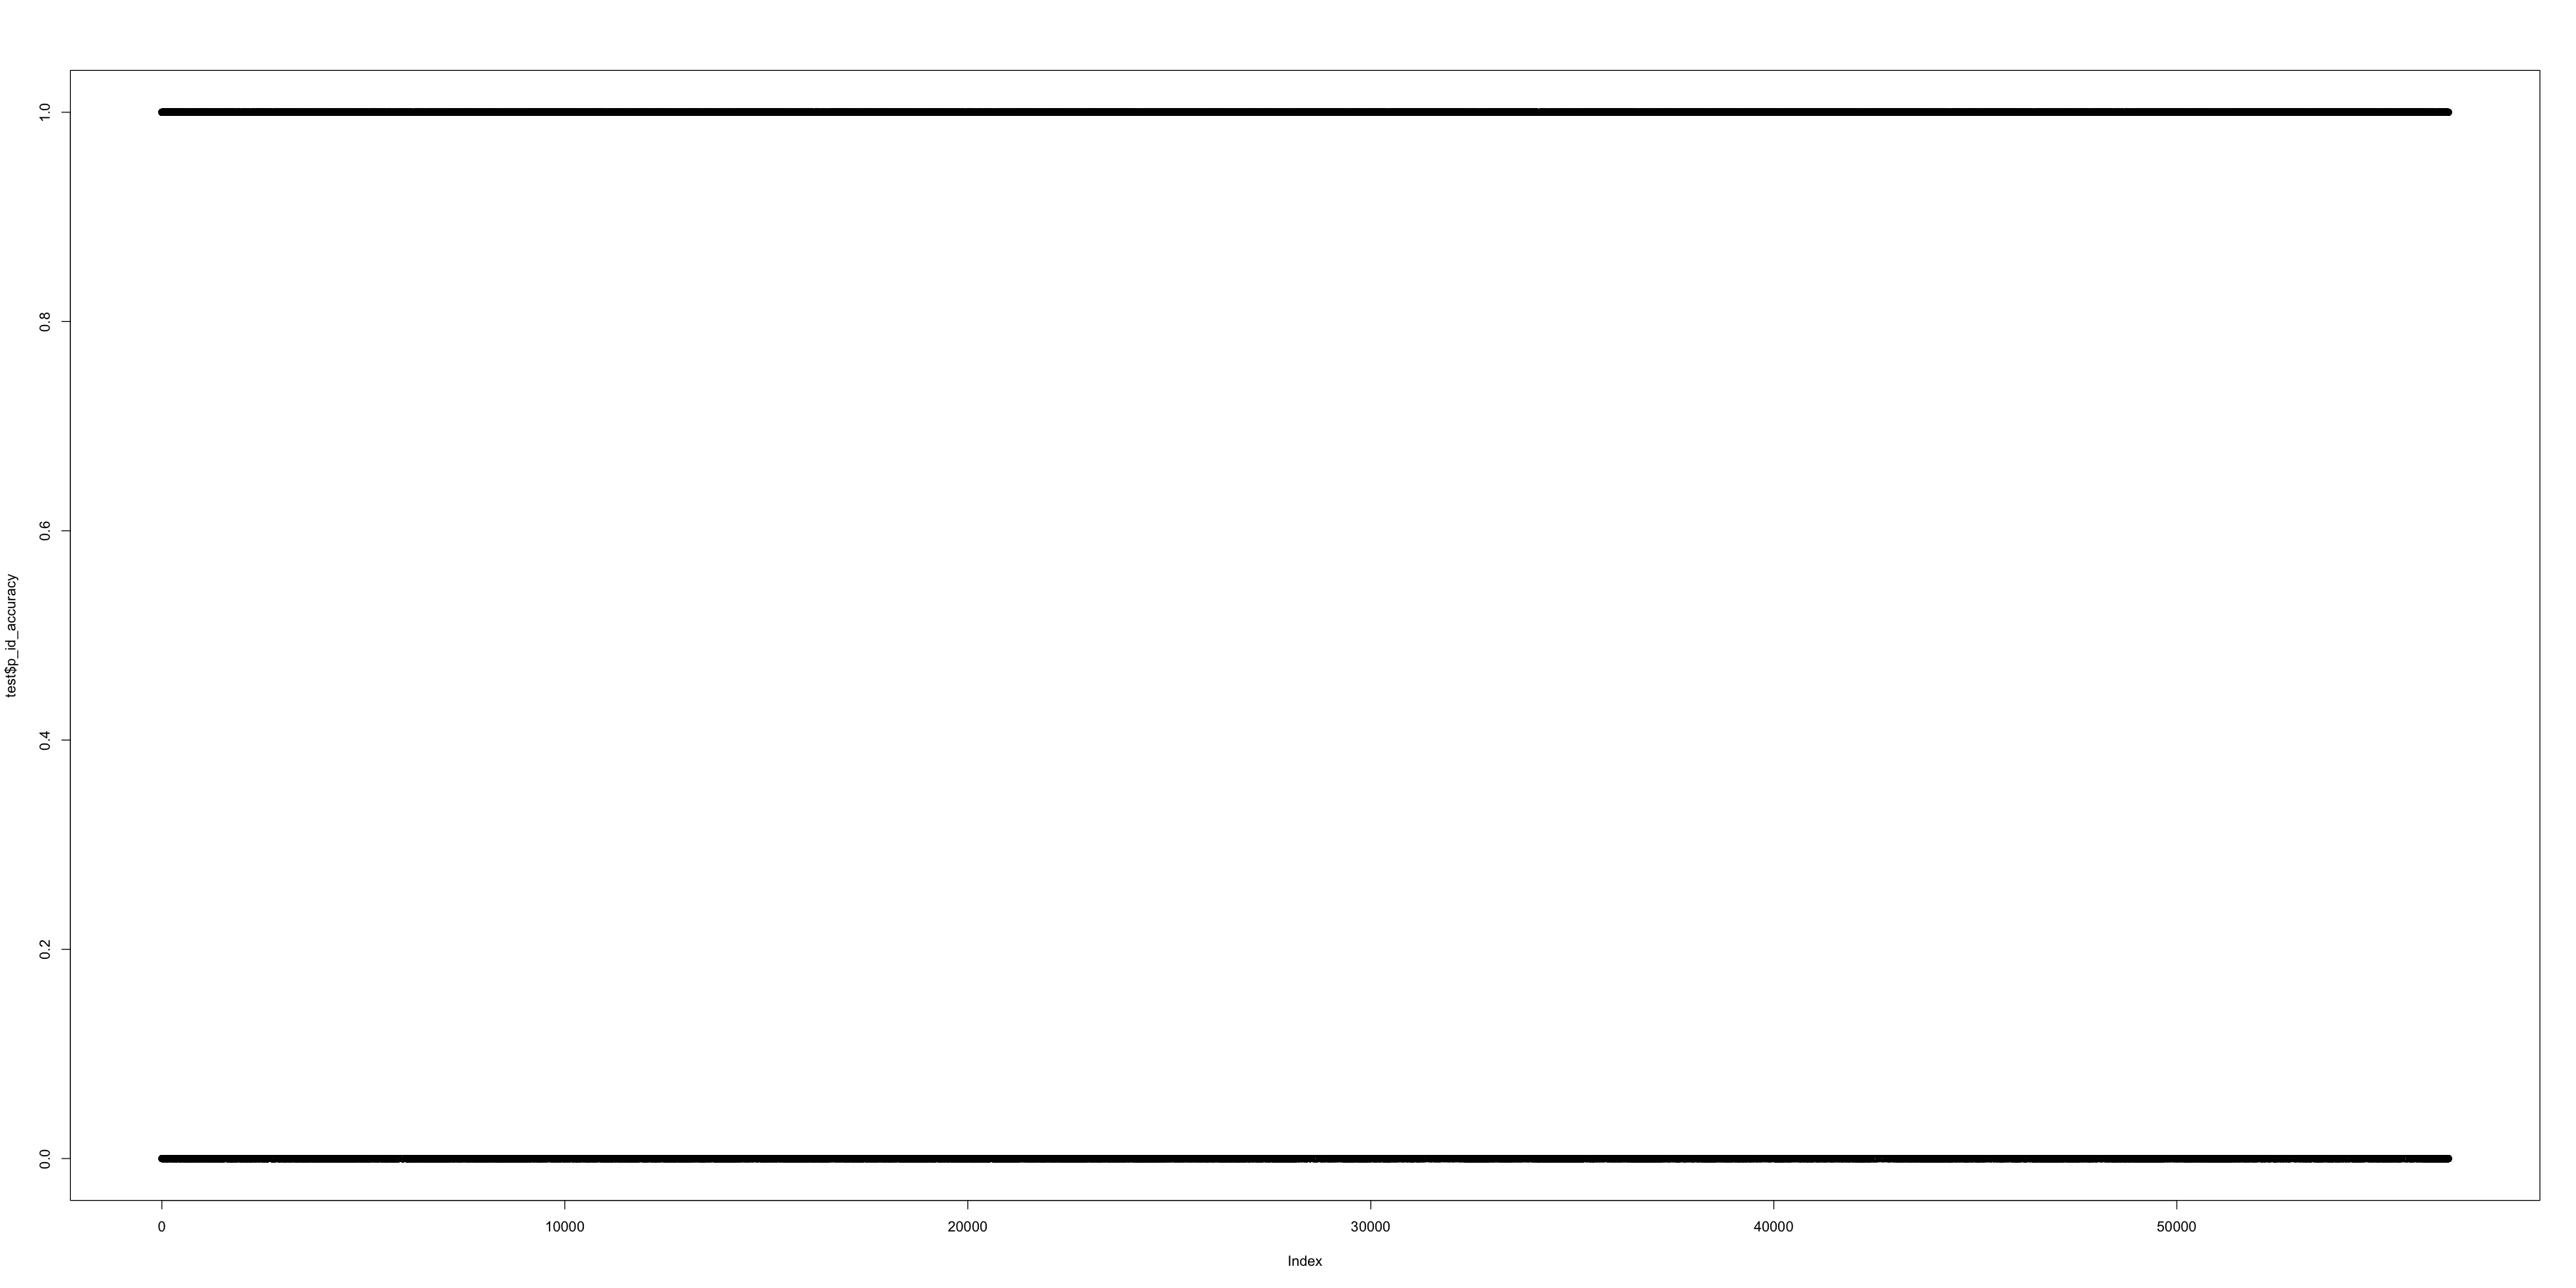

In [248]:
plot(test$p_id_accuracy)

In [28]:
names(clean_df)

[1] "cpp"                 "target_B"            "choice_B"           
 [4] "cp"                  "gen_drift"           "gen_bound"          
 [7] "rt"                  "acc"                 "subj_idx"           
[10] "ID"                  "cond"                "condition"          
[13] "coded_condition"     "trial"               "epoch_n"            
[16] "epoch_trial"         "max_e_trial"         "cp_with_slow_fast"  
[19] "shifted_epoch_trial" "max_epoch_n"

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$train_position(data, scale_

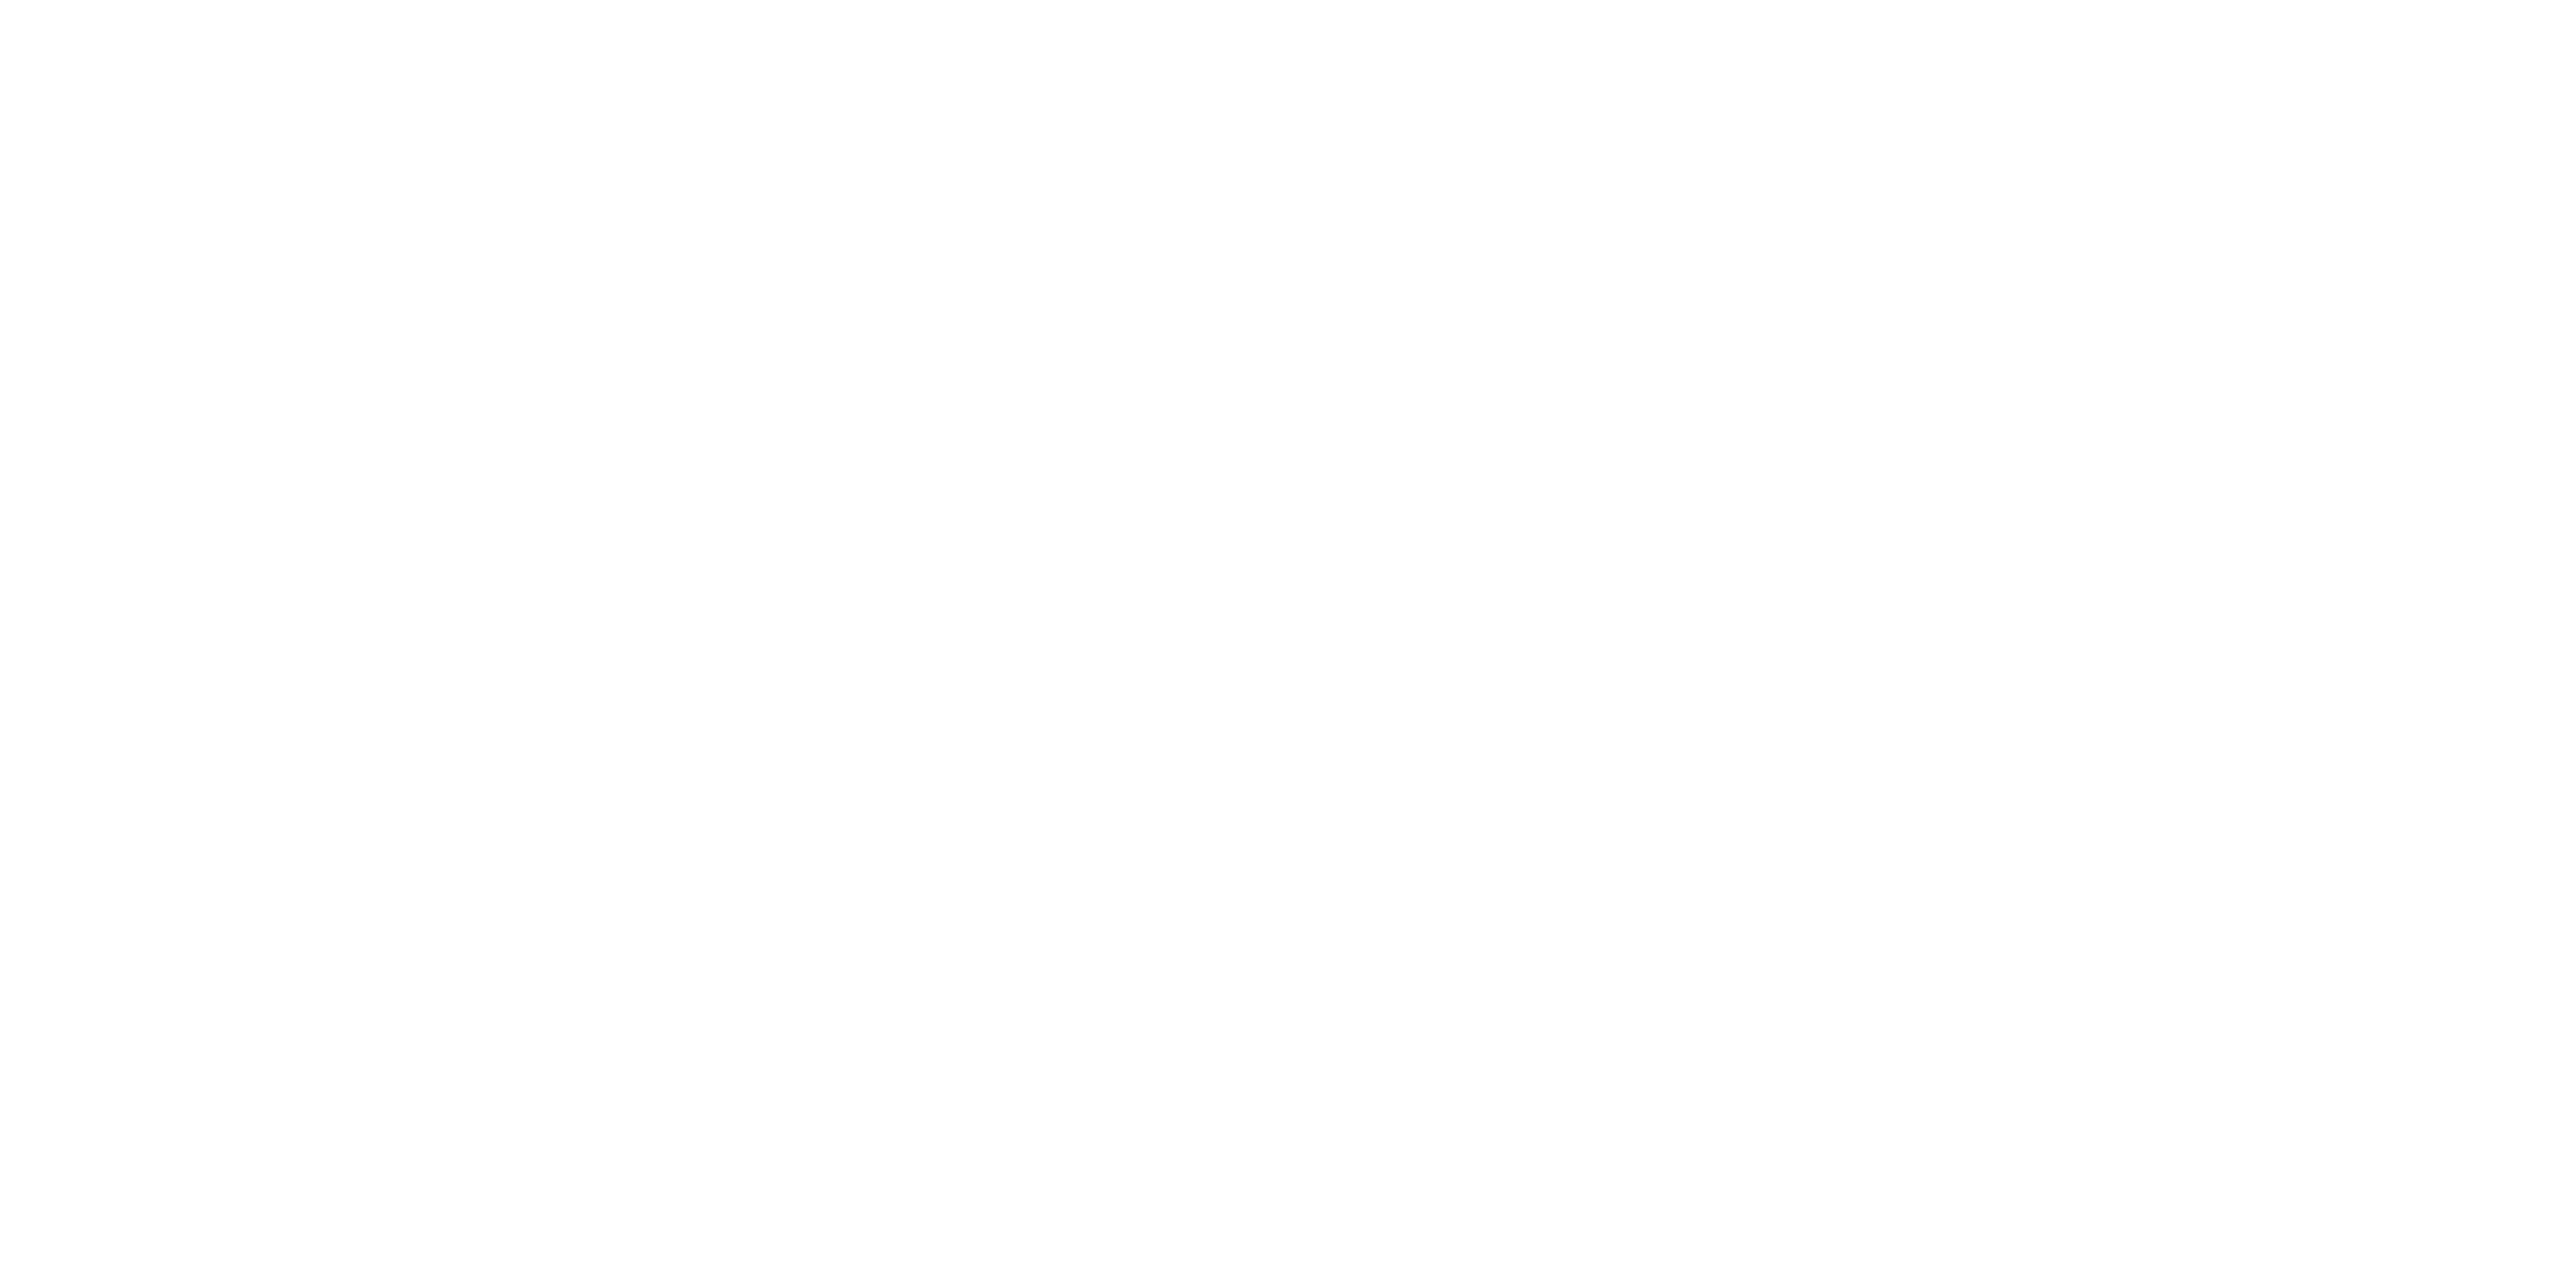

In [33]:
#tc for all conditions 
options(repr.plot.width=30, repr.plot.height=15)

ggplot(subset(clean_df, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1)), aes(shifted_epoch_trial, acc, col=cond)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=cond), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5)

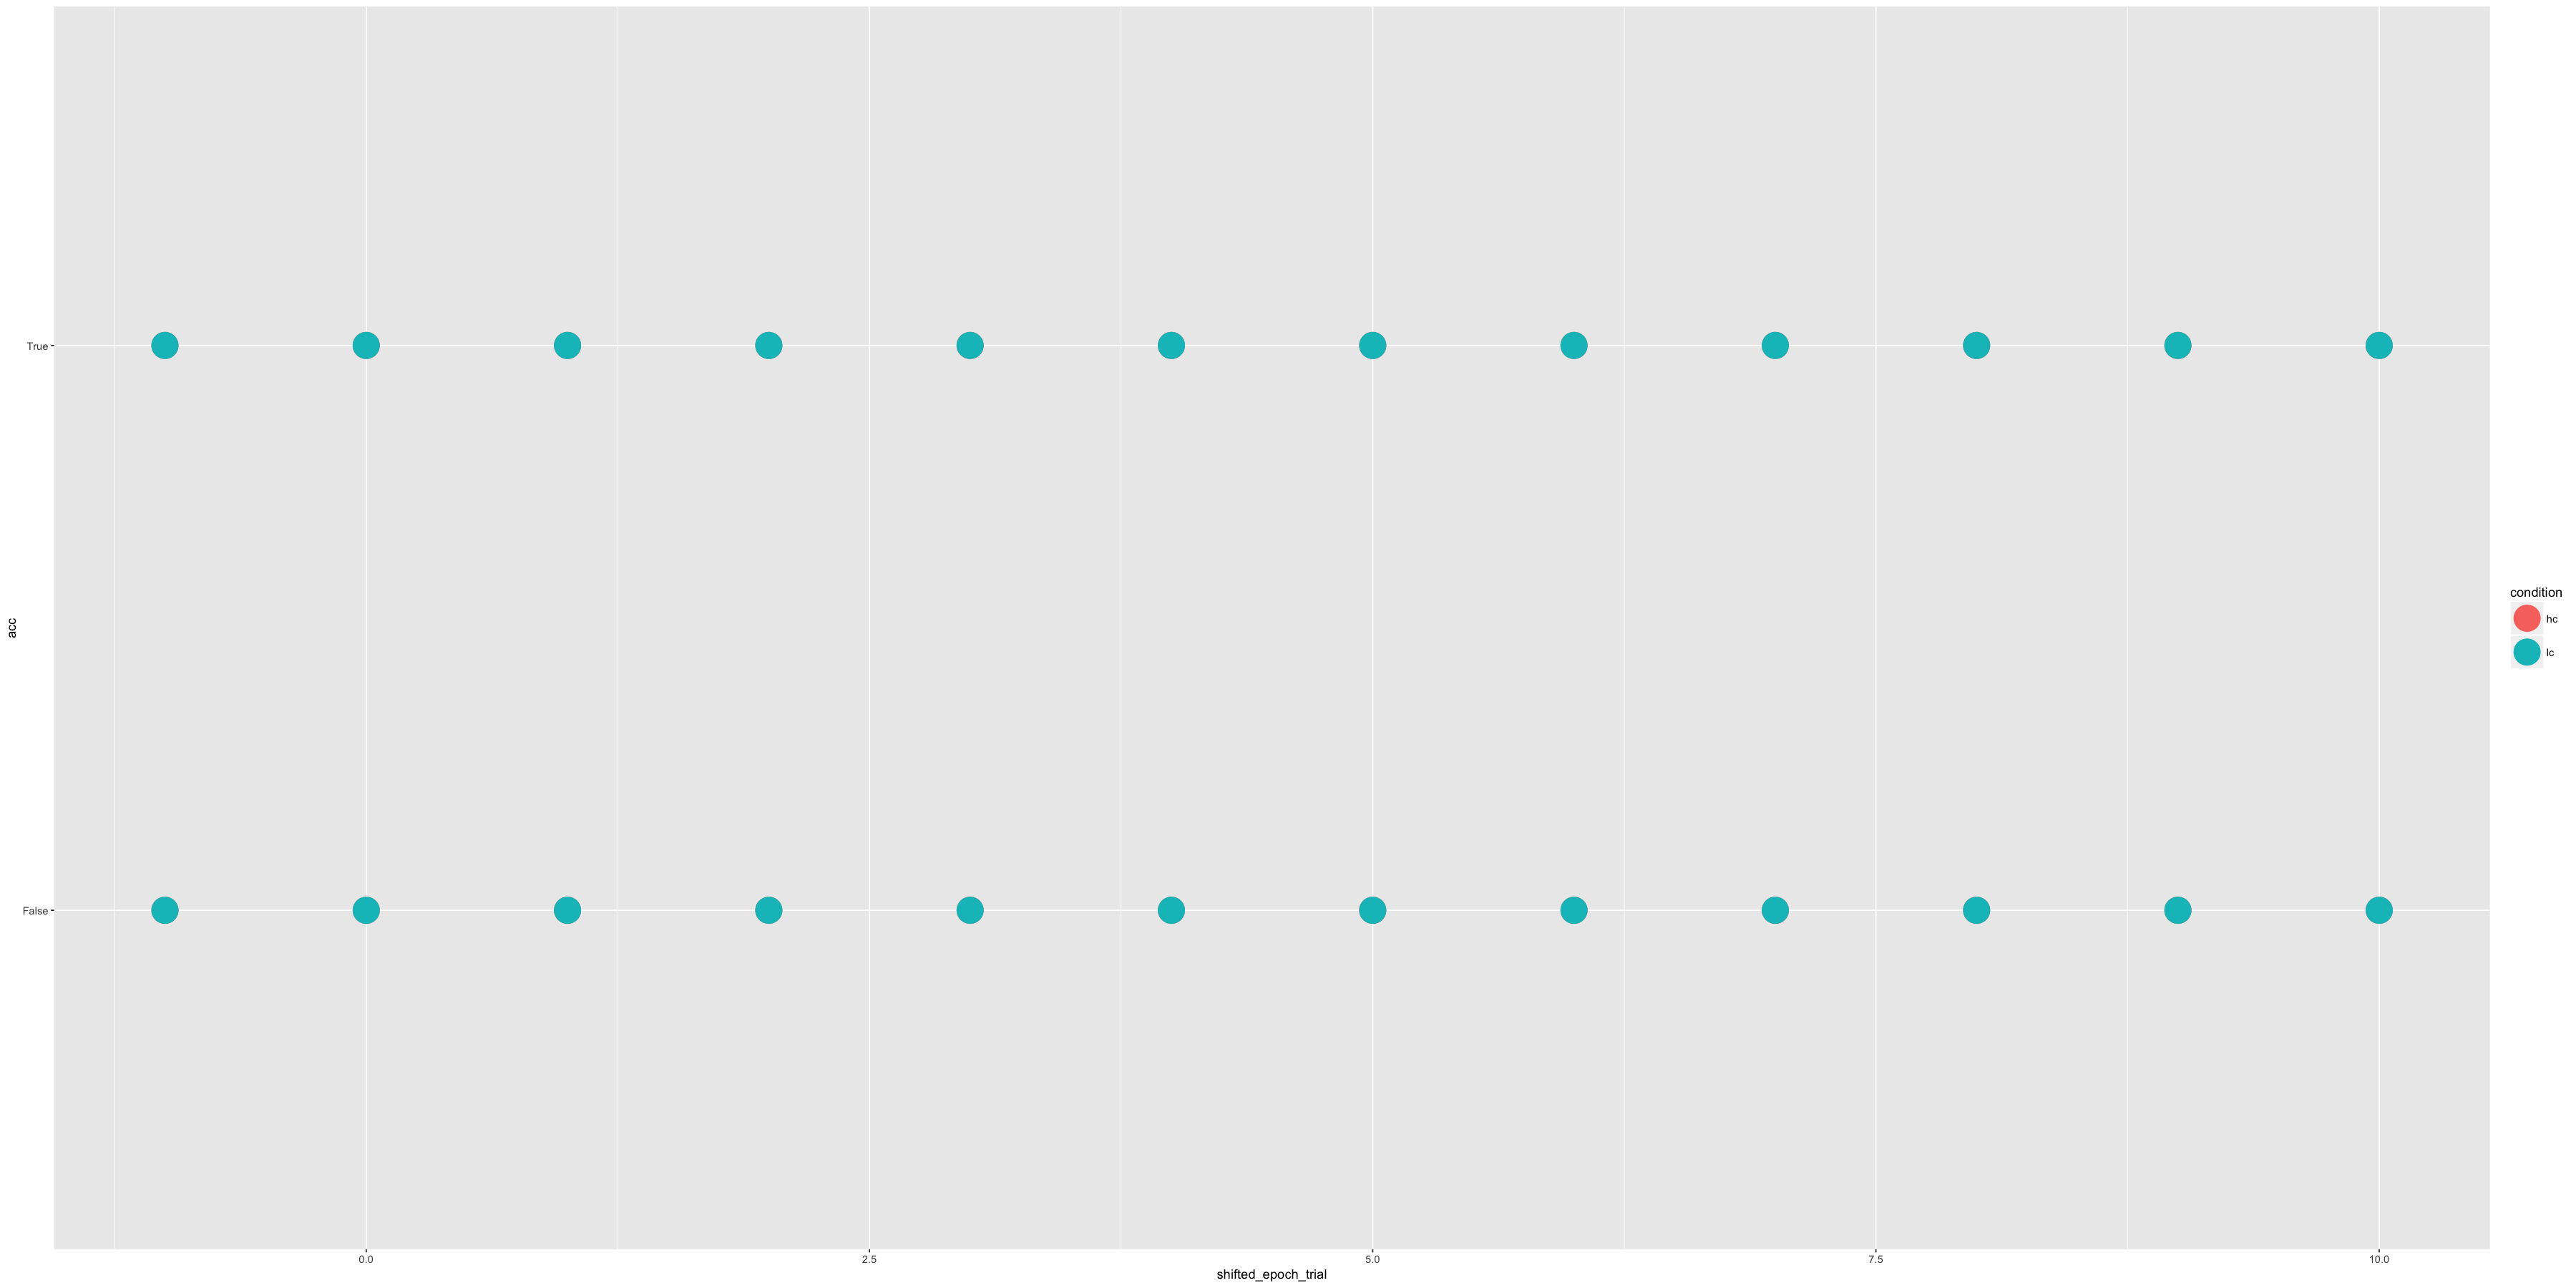

In [36]:
ggplot(subset(clean_df, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial, acc, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10)

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$train_position(data, scale_

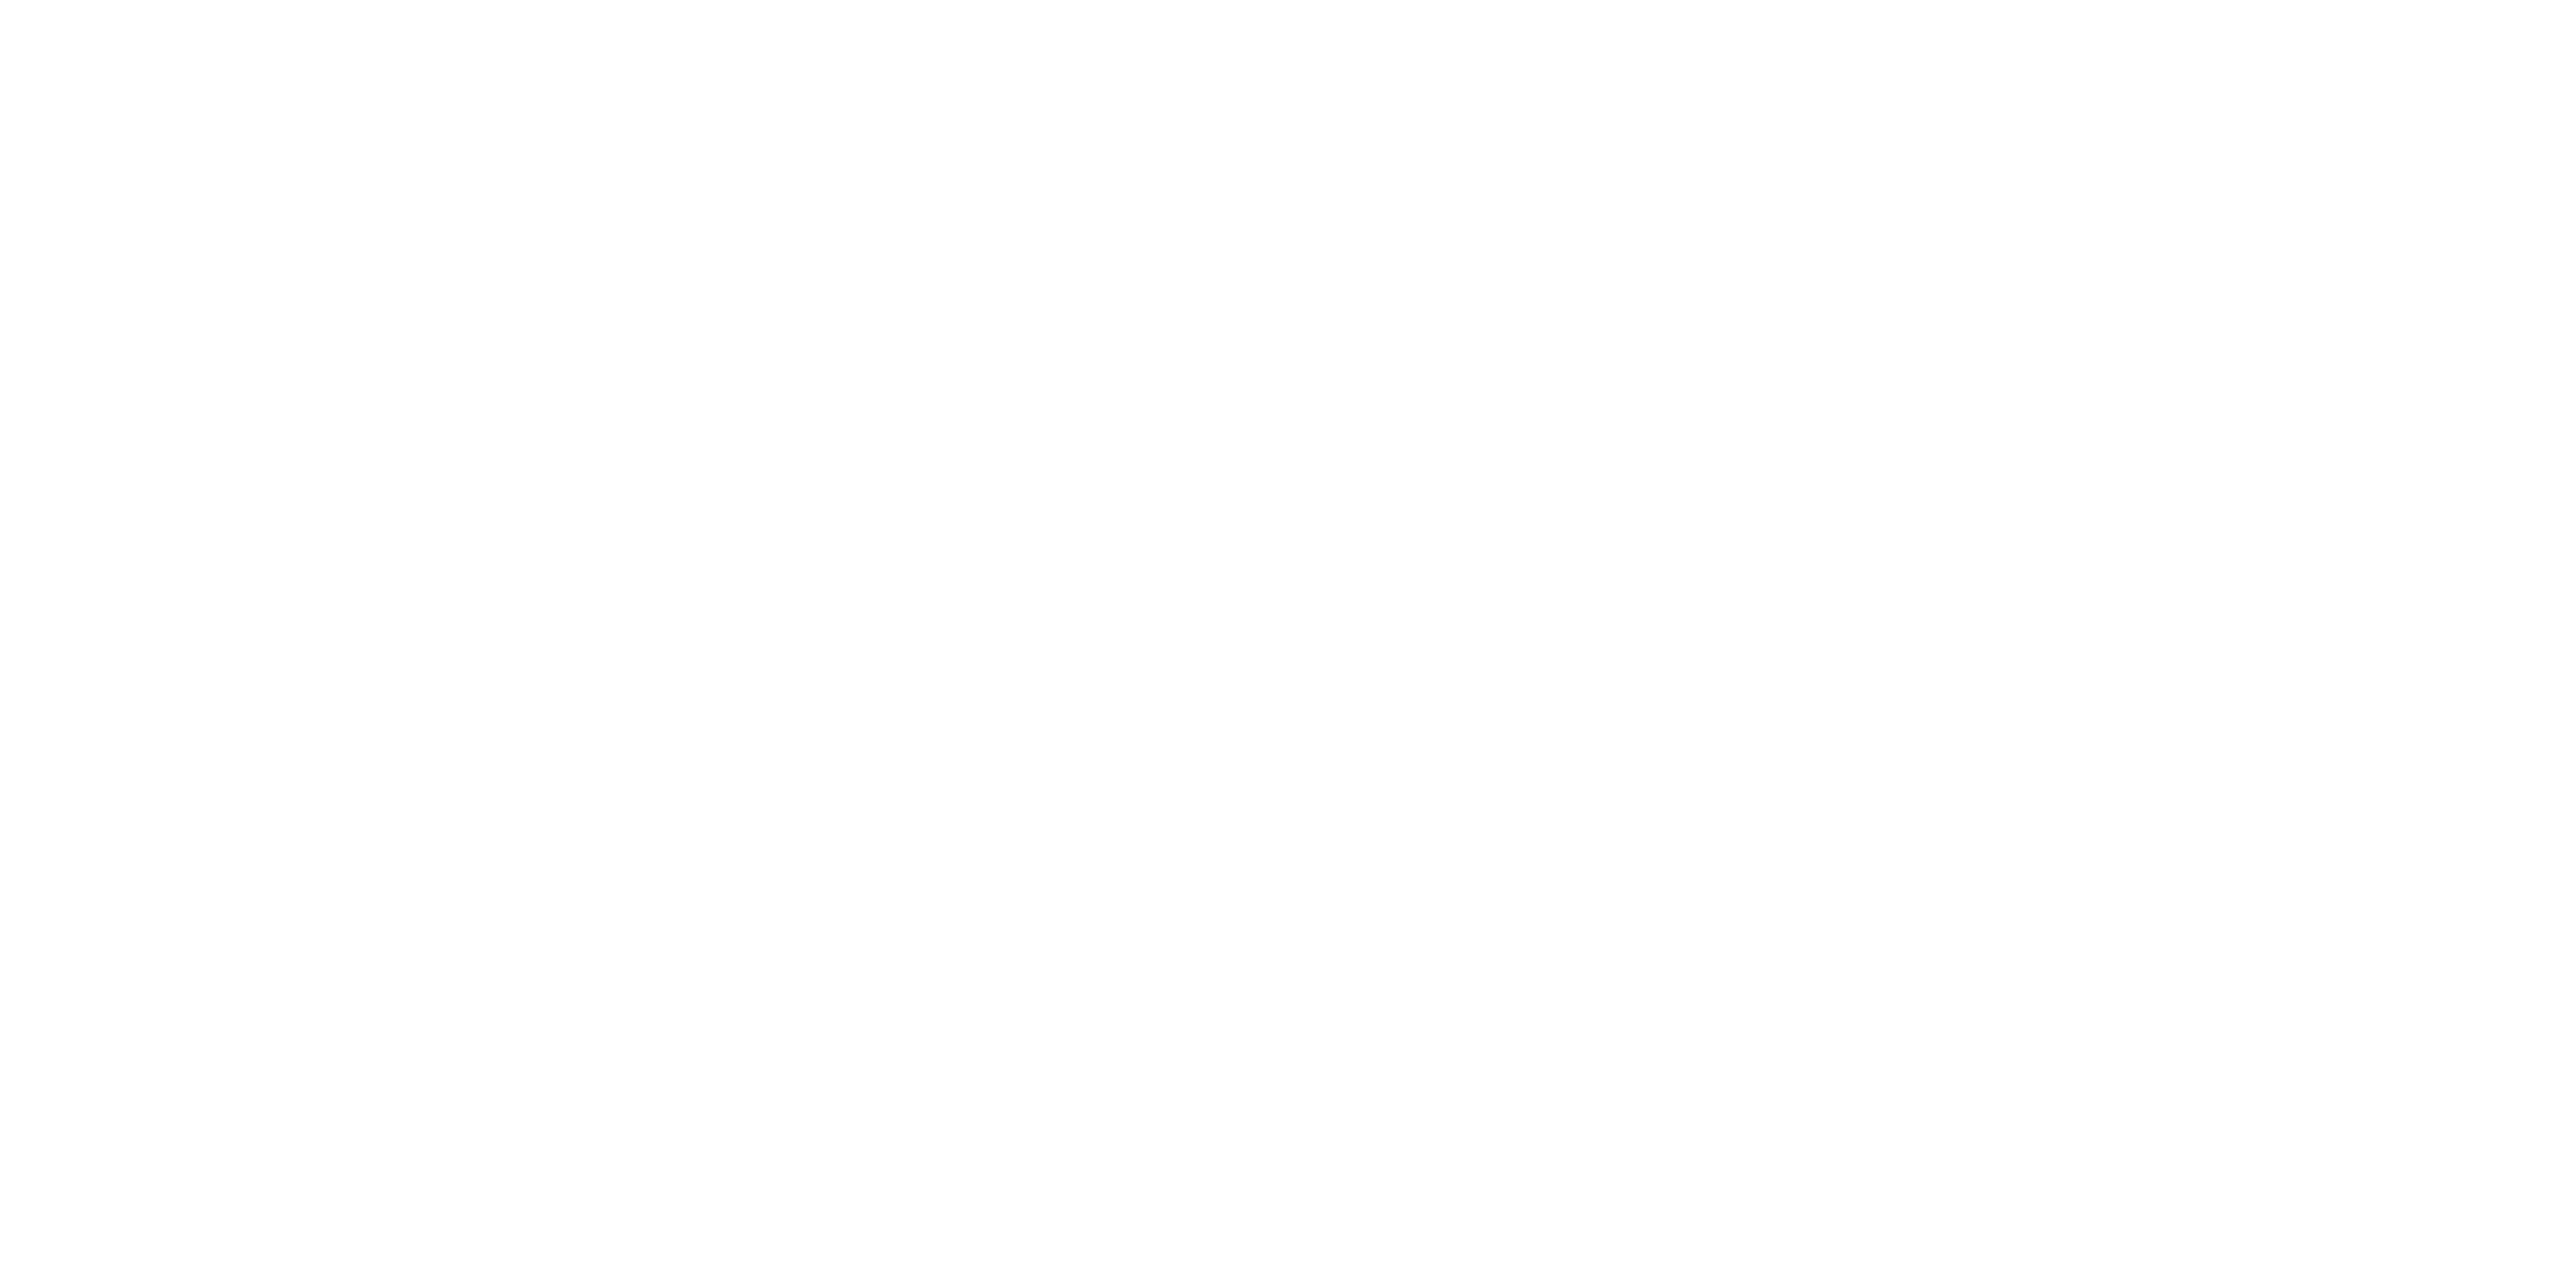

In [34]:
ggplot(subset(clean_df, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial, acc, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5)

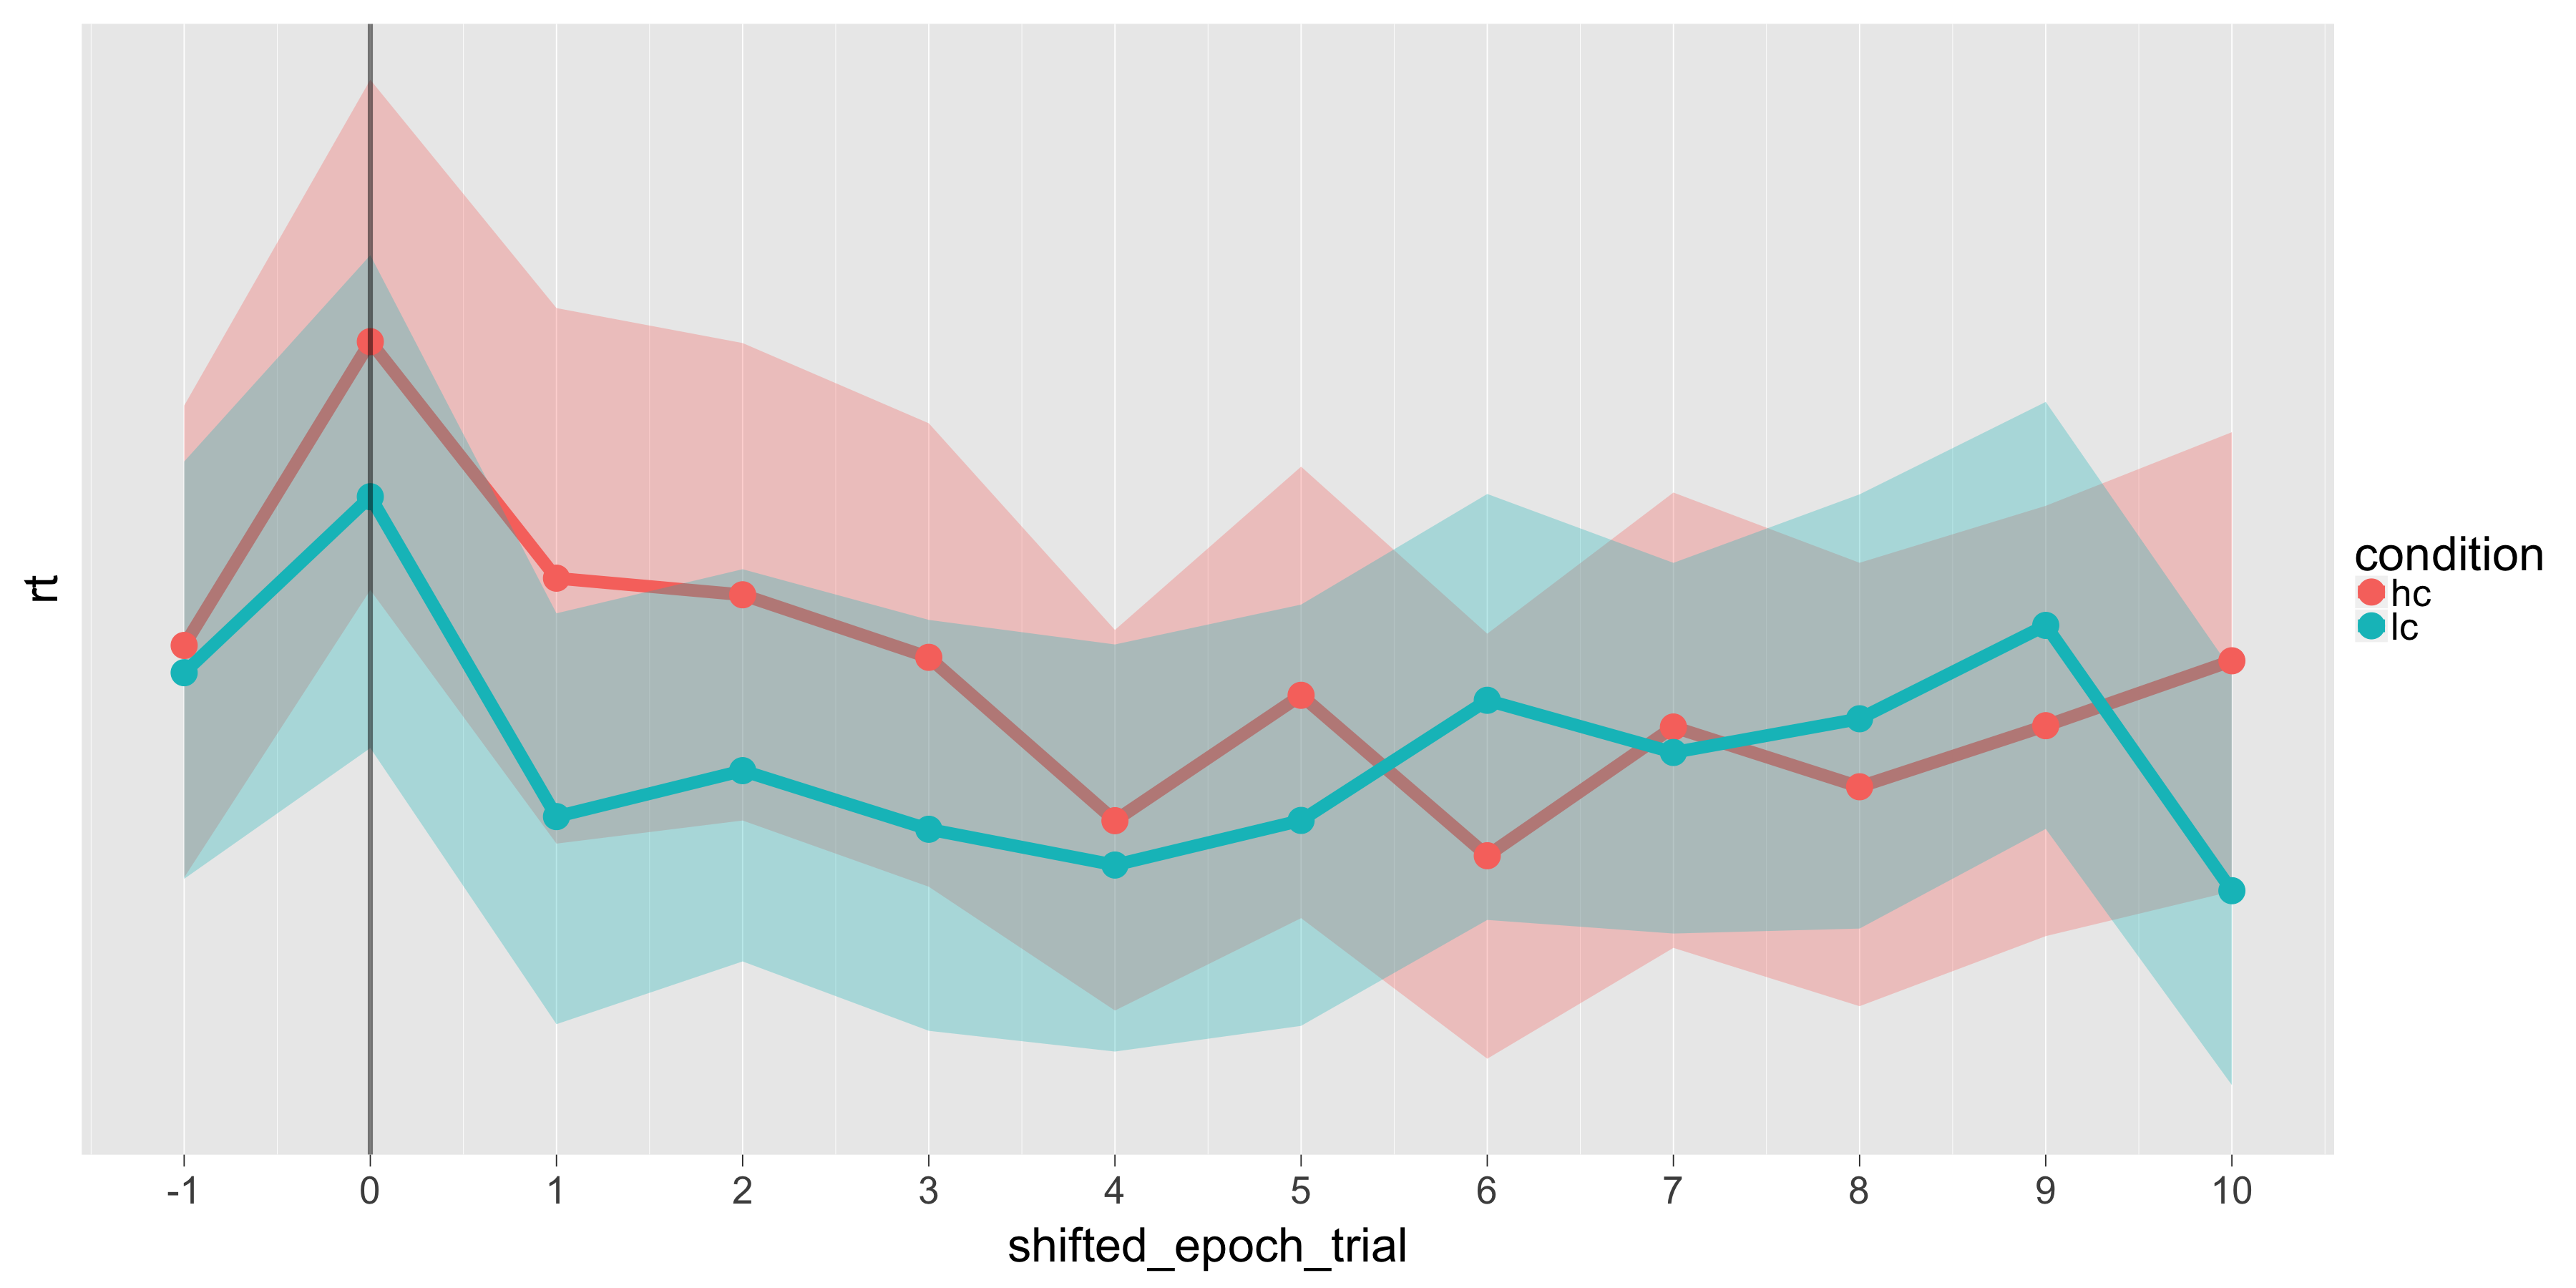

In [316]:
ggplot(subset(test, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial, rt, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5)

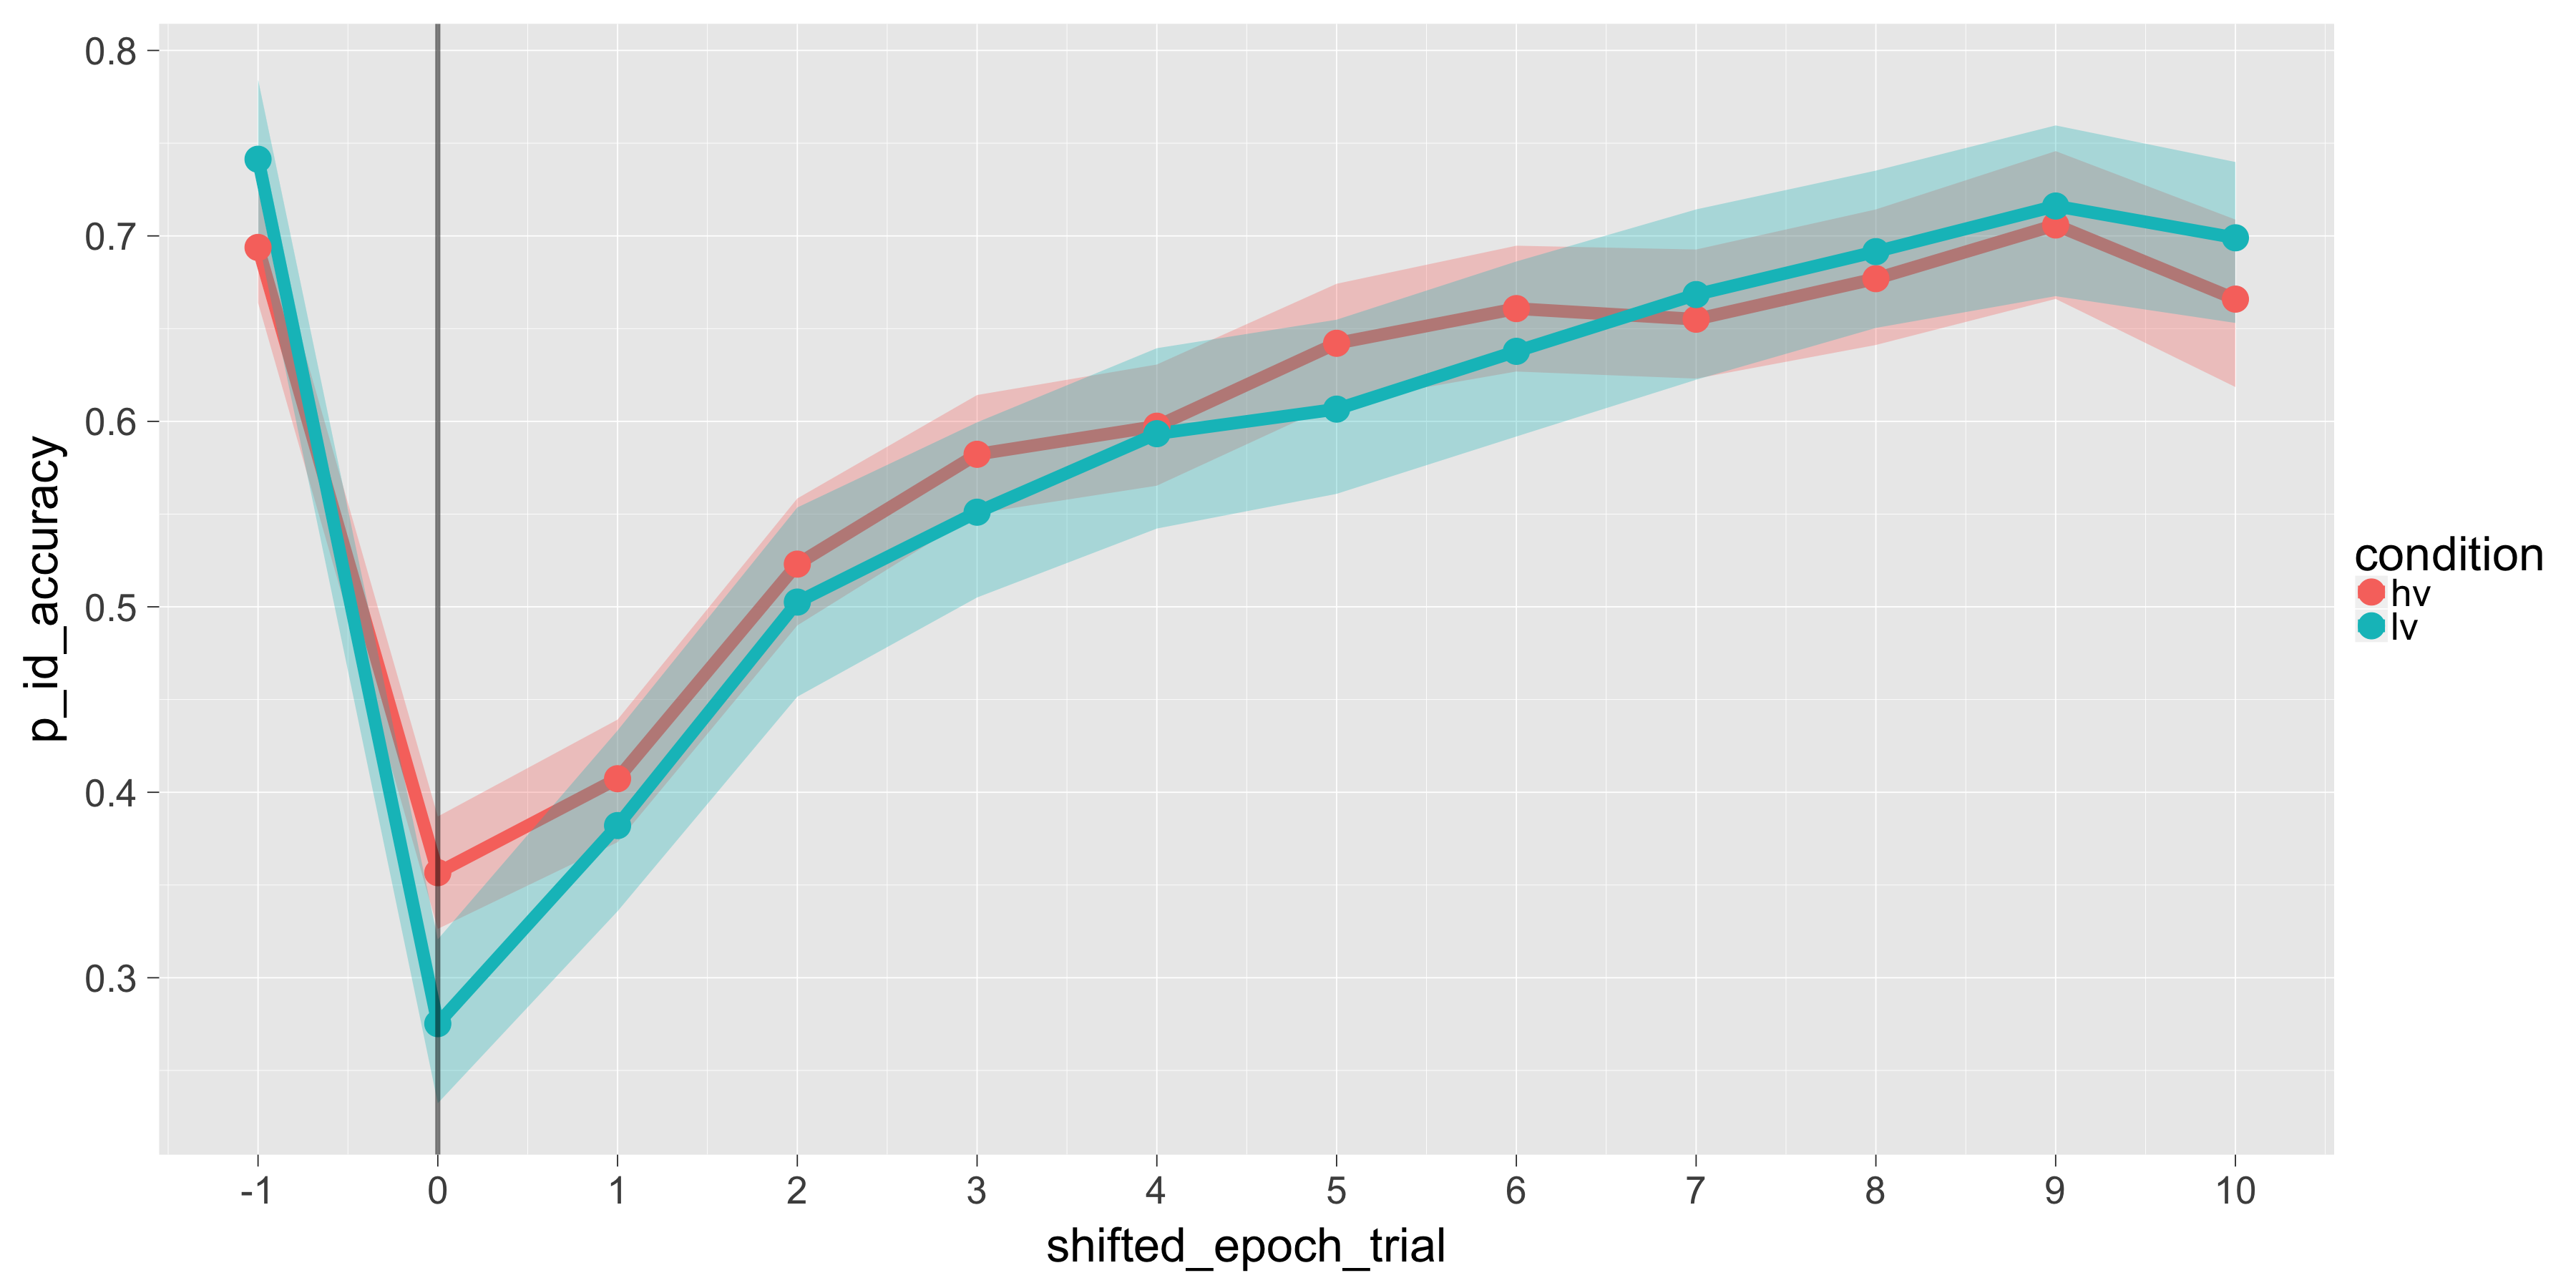

In [314]:
ggplot(subset(test, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial, p_id_accuracy, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5)

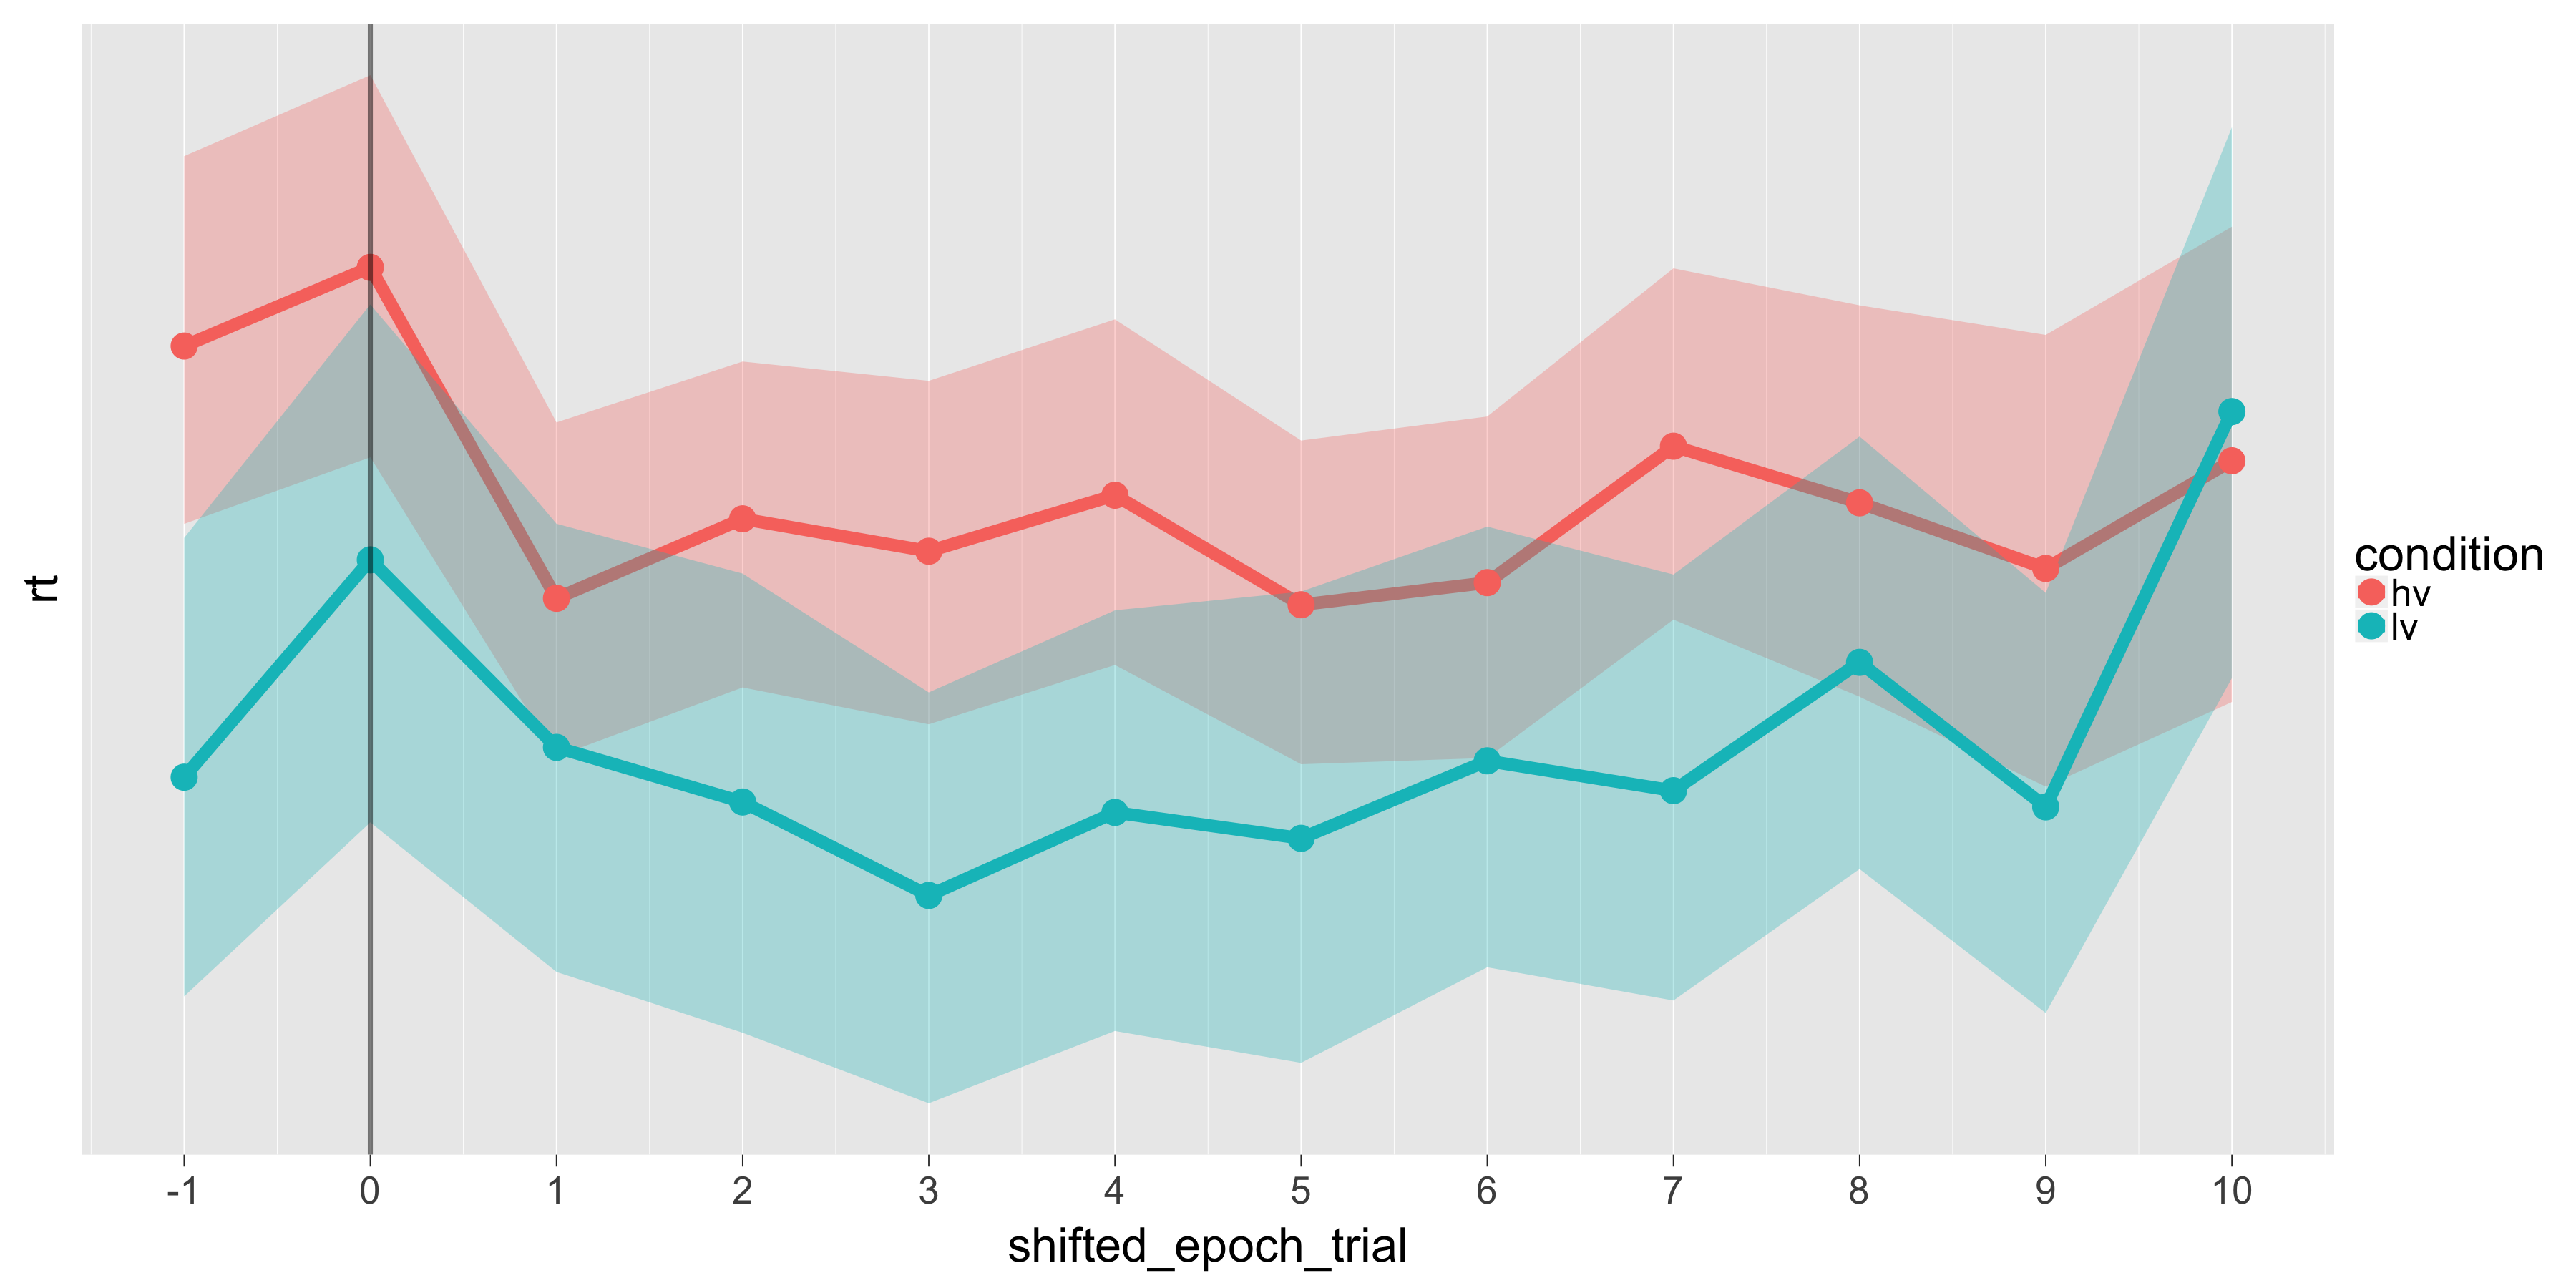

In [315]:
ggplot(subset(test, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial, rt, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5)

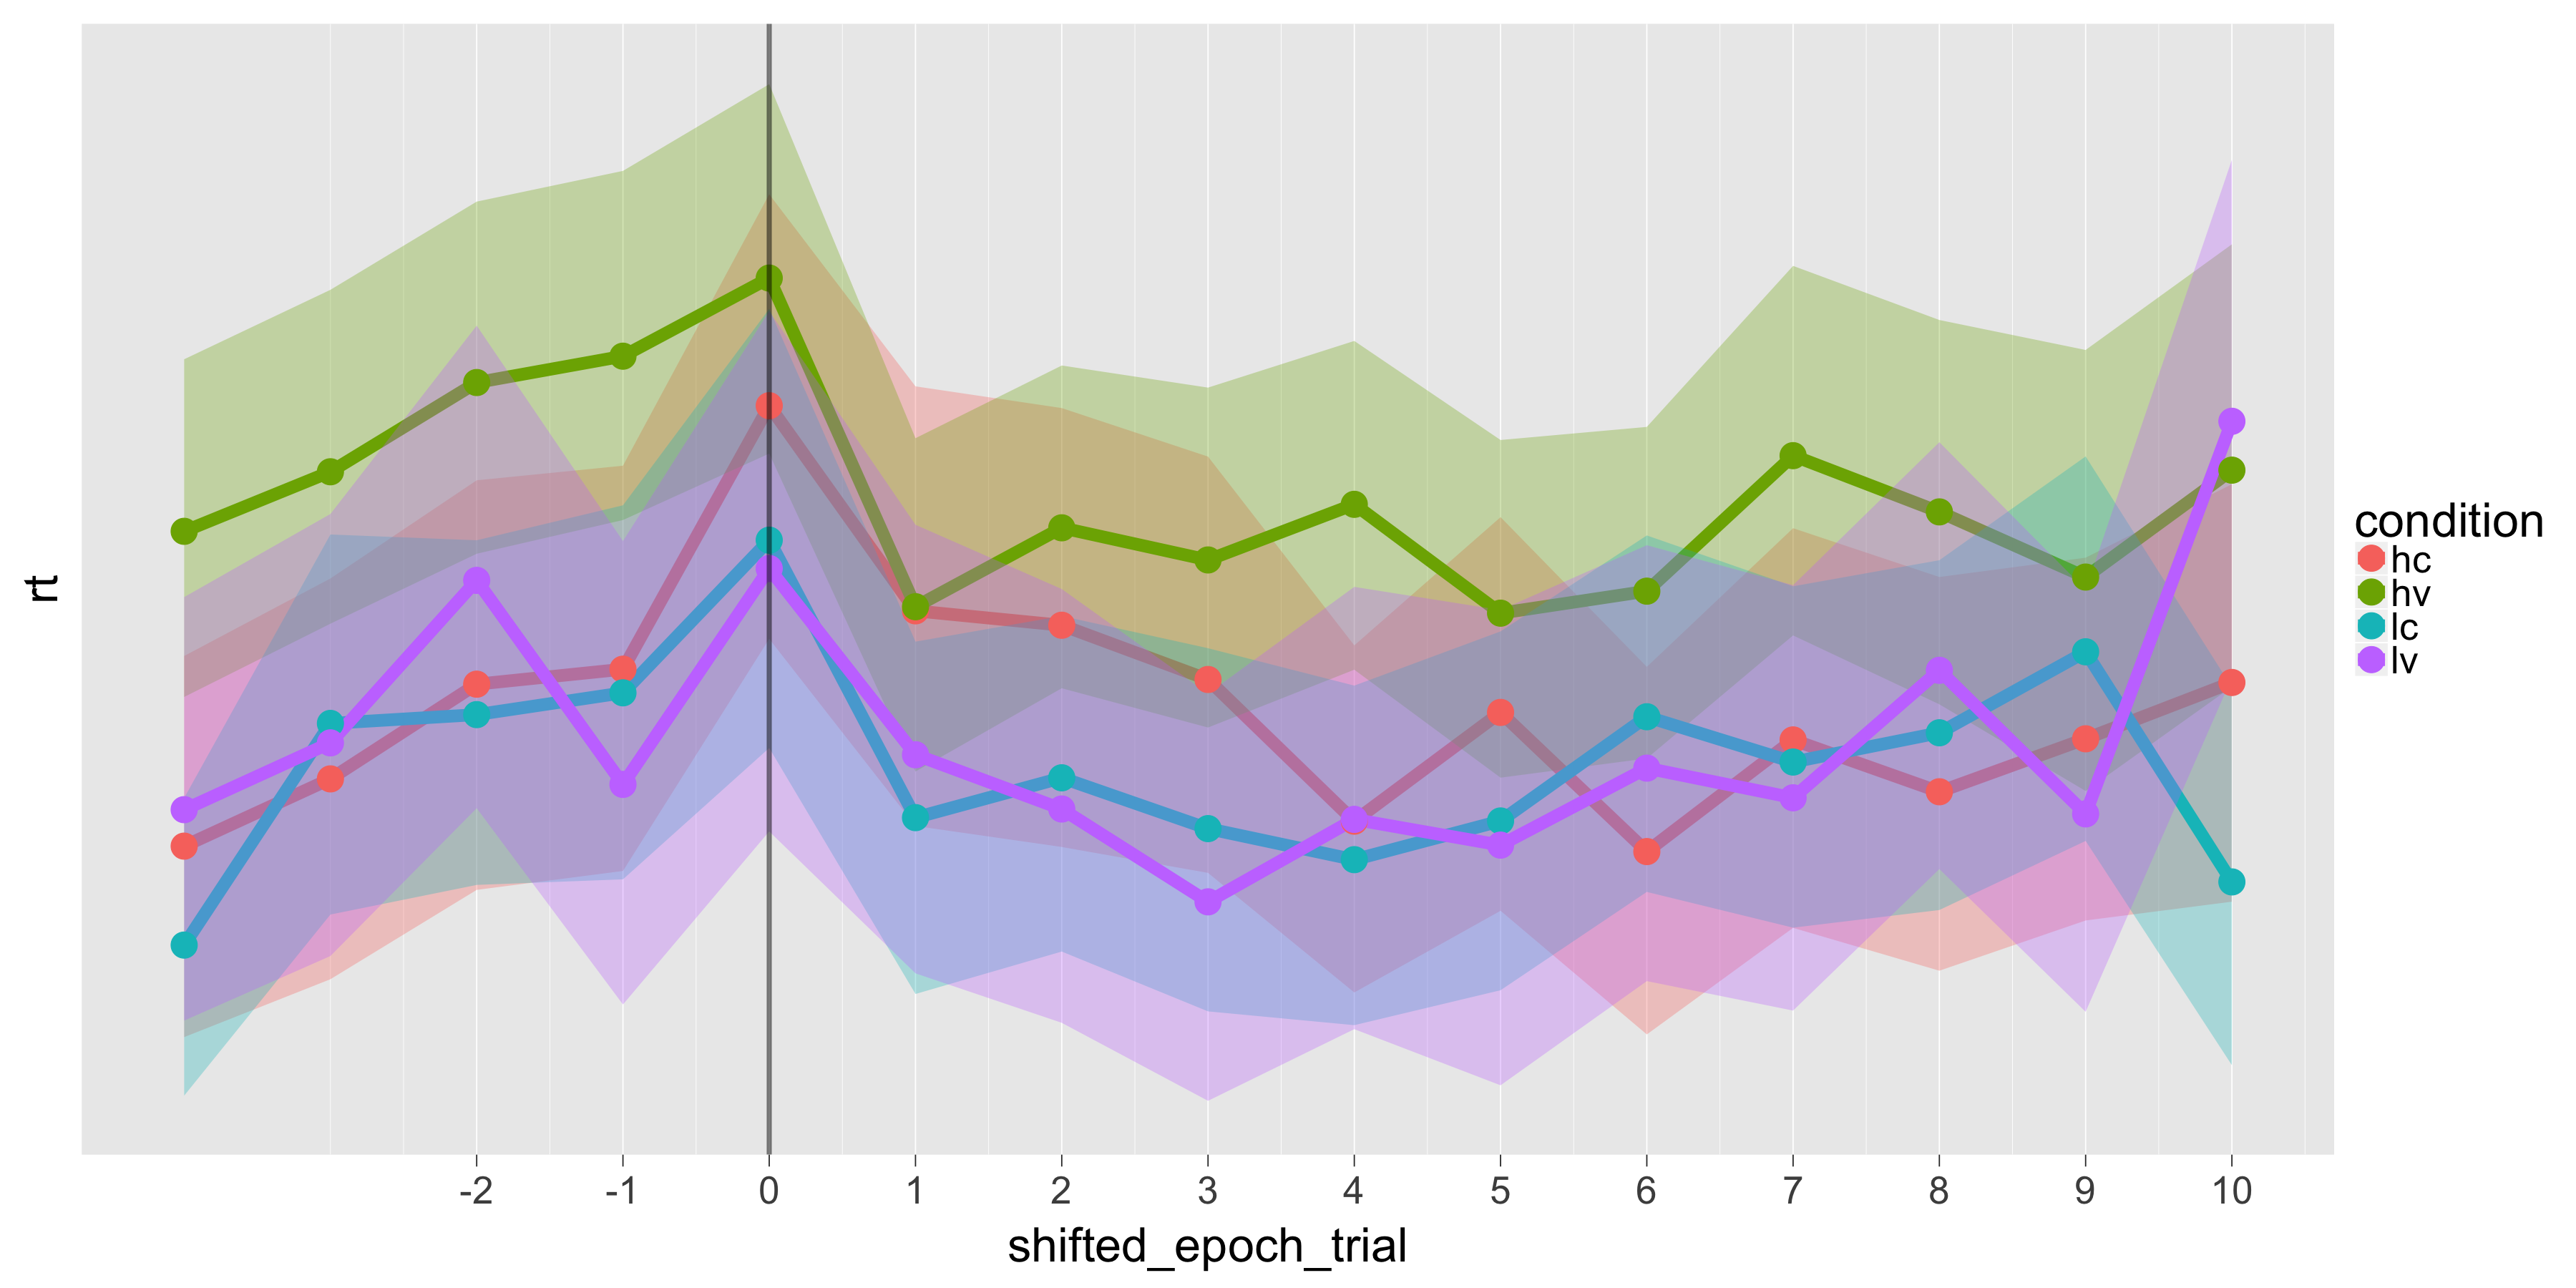

In [261]:
options(repr.plot.width=30, repr.plot.height=15)

ggplot(subset(test, (shifted_epoch_trial <= 10 & shifted_epoch_trial > -5 & epoch_n > 1)), aes(shifted_epoch_trial, rt, col=condition)) + 
stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
theme_gray(40)  + scale_x_continuous(breaks = seq(-2, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + 
geom_vline(xintercept = 0, size=2, alpha=0.5) 

In [307]:
sample <- subset(test, condition == 'lc'& ID == 761 & repeat_trial < 300)

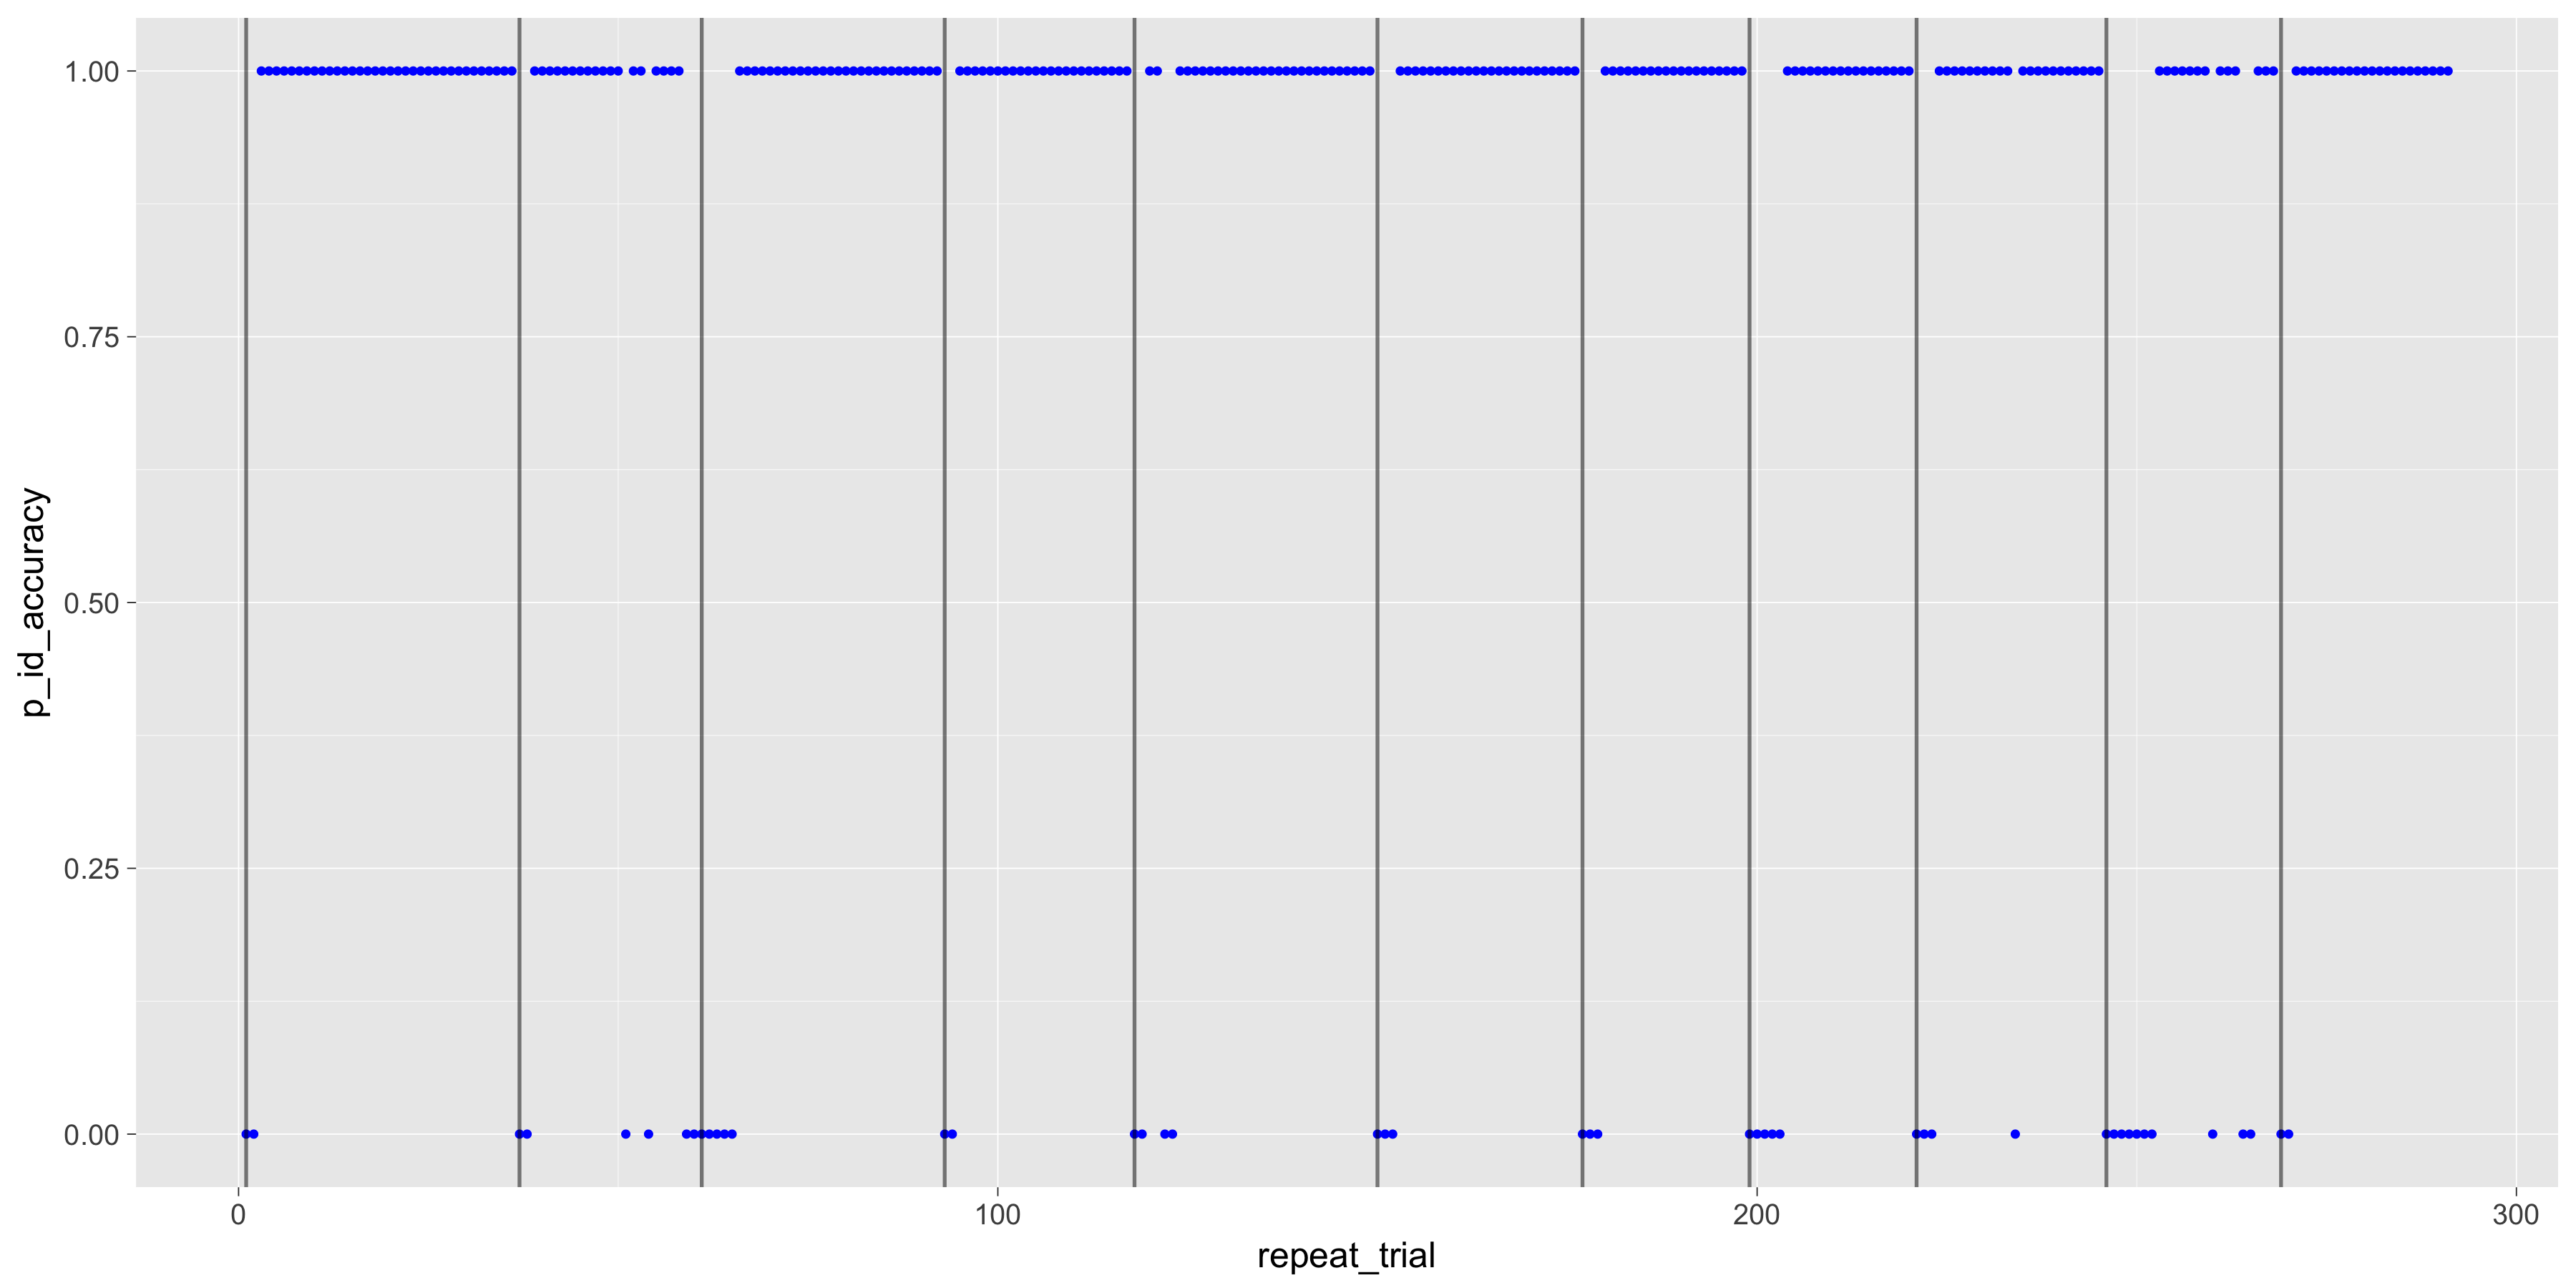

In [308]:
ggplot(sample, aes(repeat_trial, p_id_accuracy)) + geom_point(size=3, col='blue')+ 
geom_vline(xintercept=which(sample$cp_with_slow_fast == 1), alpha=0.5, size = 1.5) + theme_gray(30)

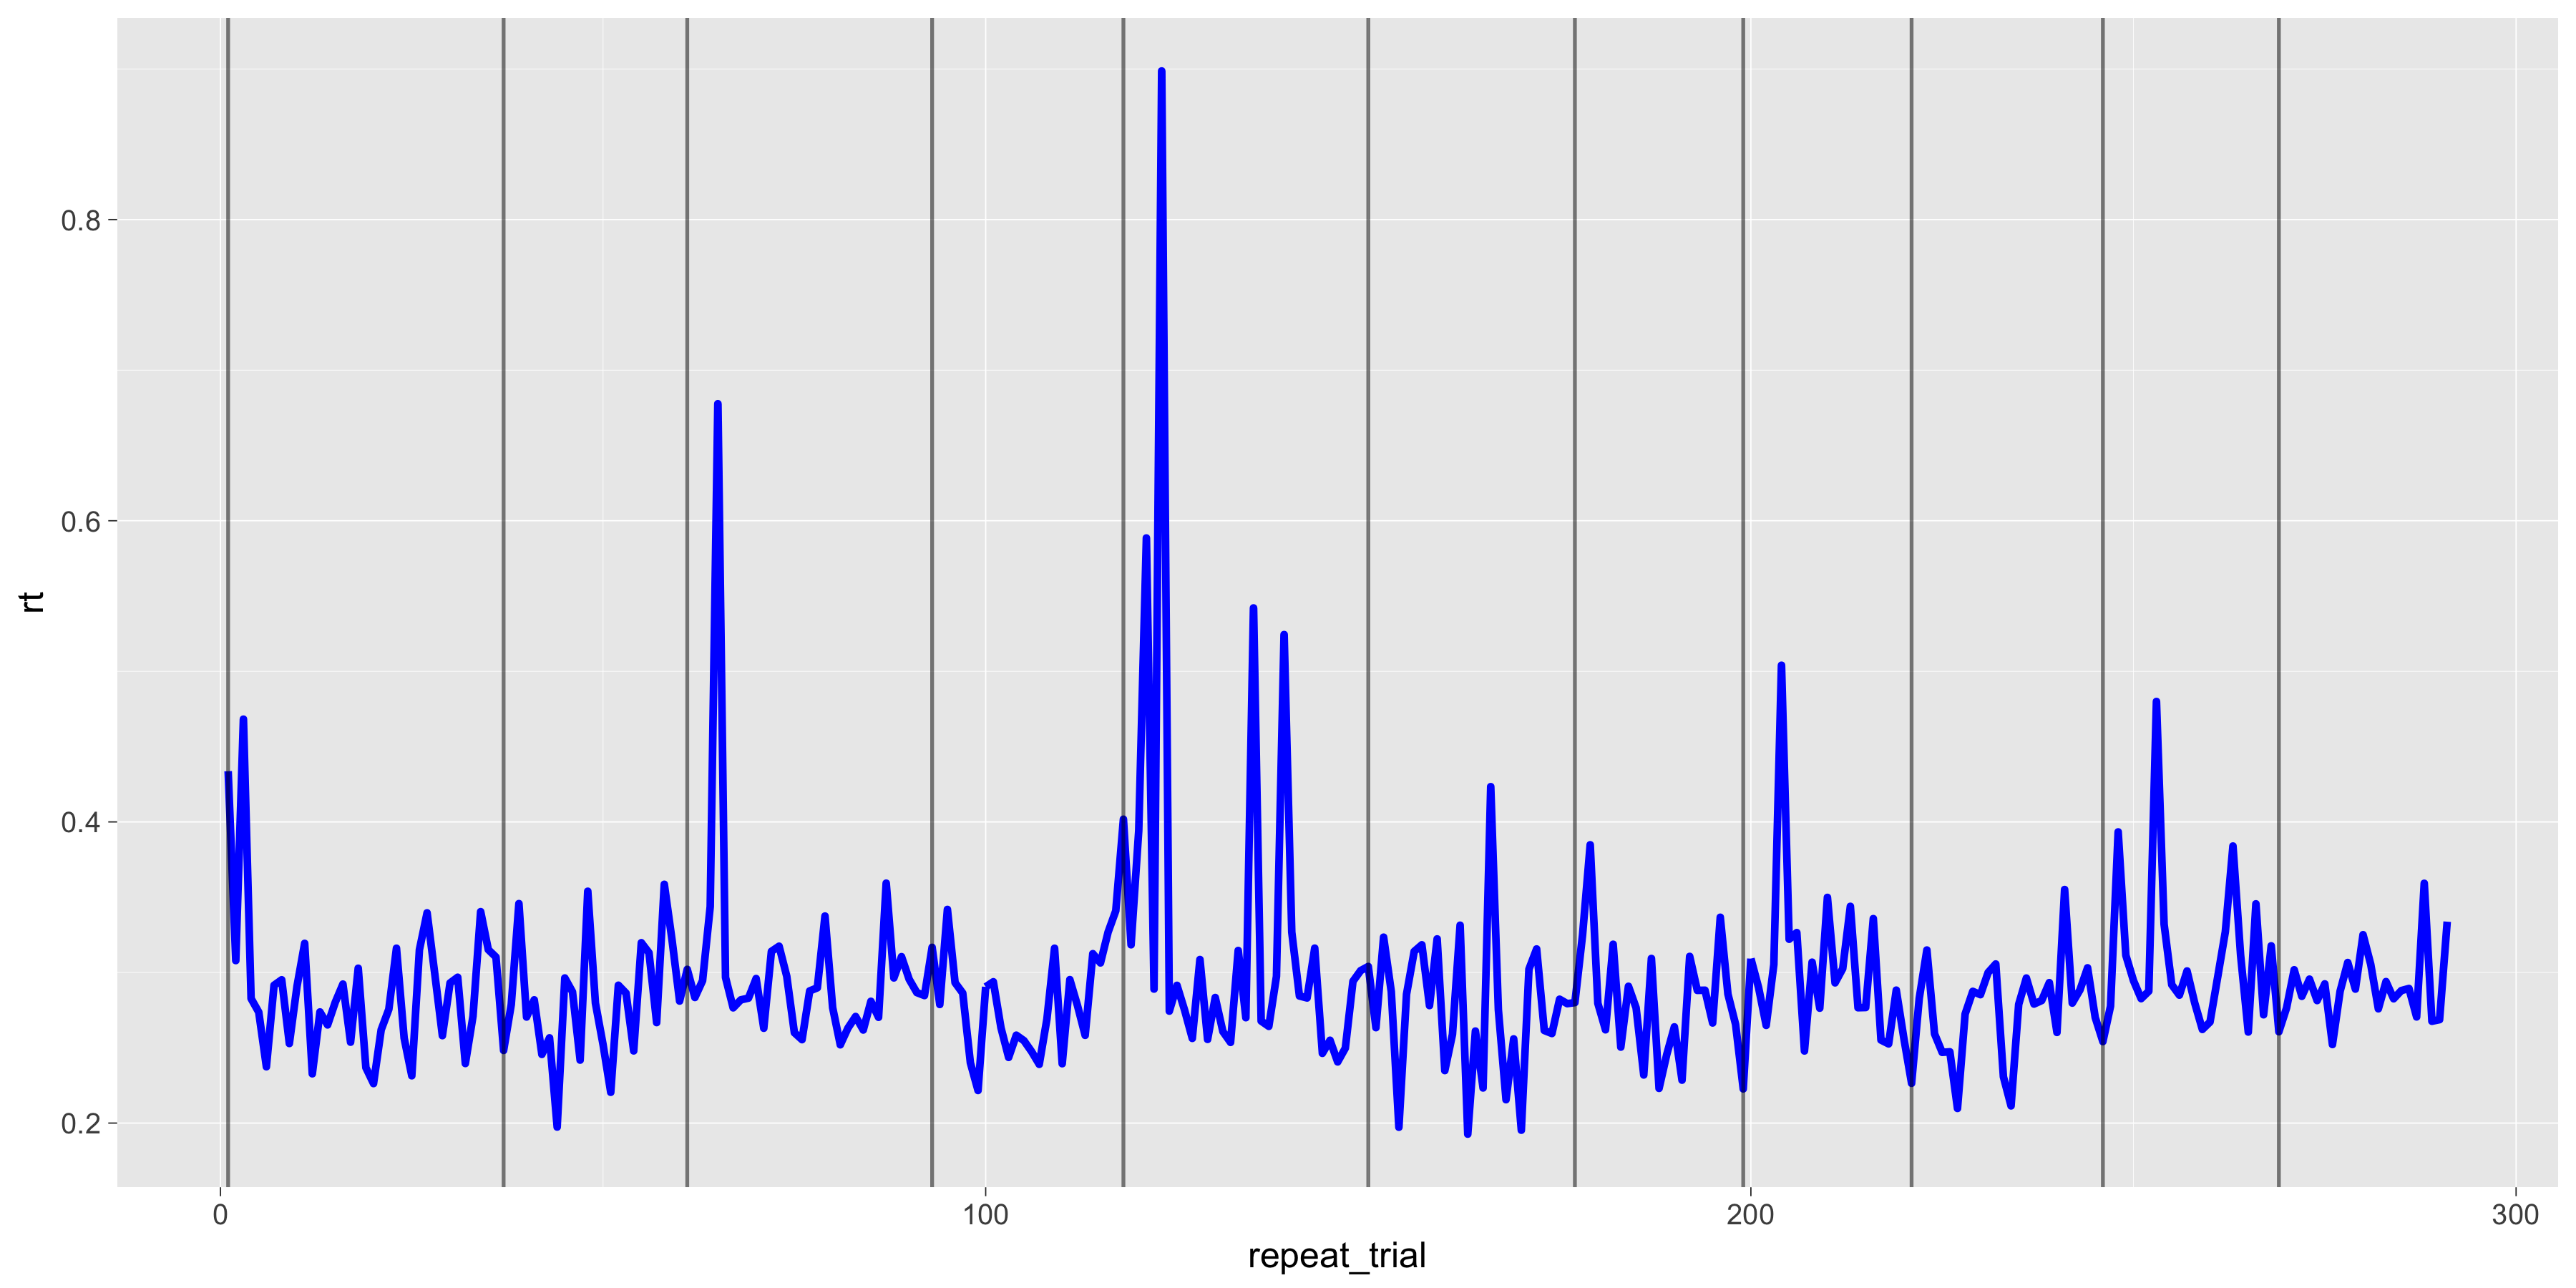

In [309]:
ggplot(sample, aes(repeat_trial, rt)) + geom_line(size=3, col='blue')+ 
geom_vline(xintercept=which(sample$cp_with_slow_fast == 1), alpha=0.5, size = 1.5) + theme_gray(30)

In [310]:
epoch_df <- subset(clean_df, epoch_trial <= 10) 

epoch_df[epoch_df$epoch_trial <= 5, 'timepoint'] = 1
epoch_df[epoch_df$epoch_trial > 5, 'timepoint'] = 2

epoch_df[epoch_df$condition == 'hc', 'conflict'] = 'high'
epoch_df[epoch_df$condition == 'lc', 'conflict'] = 'low'
epoch_df[epoch_df$condition == 'hc', 'vol'] = 'mod'
epoch_df[epoch_df$condition == 'lc', 'vol'] = 'mod'

epoch_df[epoch_df$condition == 'hv', 'vol'] = 'high'
epoch_df[epoch_df$condition == 'lv', 'vol'] = 'low'
epoch_df[epoch_df$condition == 'hv', 'conflict'] = 'mod'
epoch_df[epoch_df$condition == 'lv', 'conflict'] = 'mod'

epoch_df$conflict <- as.factor(epoch_df$conflict)
epoch_df$vol <- as.factor(epoch_df$vol)

epoch_df$conflict <- relevel(epoch_df$conflict, ref = "low")
epoch_df$vol <- relevel(epoch_df$vol, ref = "low")

epoch_df$condition <- relevel(epoch_df$condition, ref = "lc")

In [311]:
head(epoch_df)

choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,⋯,trial,epoch_n,epoch_trial,max_e_trial,shifted_epoch_trial,max_epoch_n,repeat_trial,timepoint,conflict,vol
1,1,1,3,602,0.5540650,1.863330,0.3151120,1,0,⋯,1,1,0,33,0,19,1,1,mod,low
0,1,0,5,606,0.4221590,1.721799,0.3202834,0,0,⋯,2,1,1,33,1,19,2,1,mod,low
0,1,0,1,606,0.3108258,2.001336,0.7045839,0,0,⋯,3,1,2,33,2,19,3,1,mod,low
0,0,1,0,605,0.2568660,1.748328,0.5031988,0,1,⋯,4,1,3,33,3,19,4,1,mod,low
0,1,0,2,606,0.2299318,1.606700,0.3767704,0,1,⋯,5,1,4,33,4,19,5,1,mod,low
1,1,1,3,608,0.5069599,1.837049,0.3472566,0,0,⋯,6,1,5,33,5,19,6,1,mod,low


In [312]:
# write.csv(epoch_df, paste0(agg_data_path, 'epoch_df.csv'), row.names=FALSE)
# write.csv(learning_signals_df, paste0(agg_data_path, 'learning_signals_df_processed.csv'),row.names=FALSE)
# write.csv(test, paste0(agg_data_path, 'clean_df.csv'),row.names=FALSE)